# Load Package

In [1]:
#待續
# ES 加上cross entropy試試看
#

In [2]:
#https://github.com/YuTaNCCU/201902_ANN_Metaheuristic/tree/master/ES
import random
import pandas as pd
from string import ascii_lowercase
from copy import deepcopy
from abc import ABCMeta, abstractmethod
from copy import deepcopy
from collections import deque
from numpy import argmax
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential 
from keras.callbacks import TensorBoard,EarlyStopping
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
import  seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Data

In [3]:
url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/red.csv'
red = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/white.csv'
white = pd.read_csv(url)

red['WineCatg']='red'
white['WineCatg']='white'
Wine_Data = pd.concat([red, white])

display(
    red.shape,
  white.shape,
  Wine_Data.shape,
  Wine_Data.head(5),
  Wine_Data.tail(5)
)

(1599, 13)

(4898, 13)

(6497, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [4]:
Wine_Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'WineCatg'],
      dtype='object')

In [5]:
from sklearn import preprocessing
Wine_Data_preprocessed = Wine_Data.drop(['WineCatg'], axis=1)
scaler = preprocessing.StandardScaler() 
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Wine_Data_preprocessed[col] = scaler.fit_transform(Wine_Data_preprocessed[col])
Wine_Data_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5


In [6]:
print( '原本各種quality記數: \n', Wine_Data.quality.value_counts().sort_index() )
Wine_Data_Y01 = Wine_Data_preprocessed.replace({'quality':[3,4,5,6,7,8,9]},{'quality':[0,0,0,1,1,1,1]})
print( '分類成好壞兩種quality記數: \n', Wine_Data_Y01.quality.value_counts().sort_index() )
Wine_Data_Y01.head(5)

原本各種quality記數: 
 3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64
分類成好壞兩種quality記數: 
 0    2384
1    4113
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,1
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,0


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X=Wine_Data_Y01.drop(['quality'], axis=1)
y=Wine_Data_Y01['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 123)

display(
      X_train.shape,
      X_val.shape,
      X_test.shape,
      y_train.shape,
      y_val.shape,
      y_test.shape,
)

(4157, 11)

(1040, 11)

(1300, 11)

(4157,)

(1040,)

(1300,)

# Define Performance

In [ ]:
def Performance(model):
    #######################
    ## Confusion Matrix  ##
    #######################

    # Predicting the Test set results
    y_score = model.predict(X_test) #X_train X_test
    y_pred = (y_score > 0.5)  

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred) #y_train y_test
    #######################
    ###    accuracy      ##
    #######################
    print("Our accuracy is {}%".format(round(((cm[0][0] + cm[1][1])/sum(sum(cm)))*100,2)))

    sns.heatmap(cm,annot=True)
    #######################
    ###       AUC        ##
    #######################    
    from sklearn.metrics import roc_auc_score
    print("Our AUC is {}%".format(round((roc_auc_score(y_test, y_score)*100),2)))
    
    #######################
    ###    ROC curve     ##
    #######################
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle

    from sklearn import svm, datasets
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier
    from scipy import interp
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show() 

# Define Keras Model

In [9]:
def SummarizeHistory(modelcallbacks, prfix='', UseValid=False) :
    
    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'loss'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'loss'])  #val_loss 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'acc'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'acc'])  # val_mean_absolute_error
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
def ModelCompile():
    from keras import backend as K
    from keras.layers import Dense
    from keras.models import Sequential, Model as keras_models_Model

    K.clear_session() 
    gpu_options = tf.GPUOptions(allow_growth=True)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    tf.keras.backend.set_session(sess)

    model = Sequential()
    model.add(Dense(round(X_train.shape[1]/2), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(round(X_train.shape[1]/2), activation='relu'))
    model.add(Dense(round(X_train.shape[1]/4), activation='relu', name = 'IntermediateLayer'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def ModelFit(model, weights, epochs):
    #class_weight = {0: 1., 1: 1525/2632}
    model.set_weights(weights)
    modelcallbacks = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1,
        validation_data = (X_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)],
        shuffle=True) #, class_weight=class_weight
    SummarizeHistory(modelcallbacks, UseValid=True)                                        
    weights = model.get_weights() 
    return model, weights

# Define ES Class 

In [16]:
class ES:
    """
    Conducts tabu search
    """
    __metaclass__ = ABCMeta

    #default hyper parameters
    InitialSigma = None
    ParentsSize = None
    ChildSize = None
    tao = None
    
    #for input/output
    KerasModels = None
    WeightsStrucure = None   
    weights = None
    
    #for record
    cur_steps = 1
    best_weight = None
    best_score = None
    best_Loss = None
    
    UseOLSReg=None
    X_train=None
    y_train=None
    
    def __init__(self, KerasModels, X_train, y_train, UseOLSReg=False, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5):
        """
        :param KerasModels: a Keras model, like keras.engine.sequential.Sequential
        :param weights: initial weights, should be a Keras model weight
        :param max_steps: maximum number of steps to run algorithm for
        :param UseOLSReg: If True, than use "OLS Regression" for the last layer
        
        """
        self.KerasModels = KerasModels
        
        self.UseOLSReg = UseOLSReg
        
        self.X_train=X_train
        self.y_train=y_train
 
        if all(isinstance(x, float) for x in [InitialSigma, tao]) and all(x > 0 for x in [InitialSigma, tao]):
            self.InitialSigma = InitialSigma
            self.tao = tao
        else:
            raise TypeError('InitialSigma & tao must be a positive float')
            
        if all(isinstance(x, int) for x in [ParentsSize, ChildSize]) and all(x > 0 for x in [ParentsSize, ChildSize]):
            self.ParentsSize = ParentsSize
            self.ChildSize = ChildSize
        else:
            raise TypeError('ParentsSize, ChildSize & max_steps must be a positive integer')

    def __str__(self): 
        return ('ES STEPS: %d ' +
                ' - BEST Loss: %.4f '+
                ' - BEST SCORE: %.4f ') % \
               (self.cur_steps, self.best_Loss, self.best_score)

    def __repr__(self):
        return self.__str__() 
    
    def _FlattenWeights(self, weights):
        """
        flatten weights
        
        param weights: keras神經網路的權重格式:nparray包在list中
        return WeightsStrucure : 神經網路各層的權重shape包在list中，unflatten時會用到
        return FlattenedWeights : 一維list包含所有的權重
        """
        WeightsStrucure = []
        FlattenedWeights = []
        for i_layer in weights:
            WeightsStrucure.append(i_layer.shape)
            if len(i_layer.shape) == 1 :# 該層權重的shape為一維 e.g. (15,)      
                FlattenedWeights.extend(i_layer)
            else :# 該層權重的shape為二維 e.g. (30, 15)  
                for i_links in i_layer:
                    FlattenedWeights.extend(i_links)
        return WeightsStrucure, FlattenedWeights

    def _UnflattenWeights(self, WeightsStrucure, ModifiedWeights):
        """
        Unflatten(回復成原本的結構) weights  
        
        param WeightsStrucure : 神經網路各層的權重shape包在list中
        param ModifiedWeights : 一維list包含所有meteHeuristic修改過的權重
        return: keras神經網路的權重格式:nparray包在list中
        """
        UnflattenWeights = []
        i_index = 0 
        for i_layer in WeightsStrucure:
            if len(i_layer) == 1 : # 該層權重的shape為一維 e.g. (15,)      
                TempList = ModifiedWeights[i_index:(i_index + i_layer[0])]
                TempList = np.asarray(TempList)
                i_index = i_index + i_layer[0]
            else : # 該層權重的shape為二維 e.g. (30, 15)  
                TempList = ModifiedWeights[i_index:(i_index + (i_layer[0]*i_layer[1]))]
                TempList = np.reshape(TempList, i_layer )
                i_index = i_index + (i_layer[0]*i_layer[1])
            UnflattenWeights.append(TempList)
        return UnflattenWeights   
    
    def _best(self, Population_Child_score):
        """
        Finds the best member of a neighborhood
        :param Population_Child_score: a np array
        :return: the indtex of N best member, N = ParentsSize
        """
        return np.array( Population_Child_score ).argsort()[::-1]
    
    def _Recombination(self, Population_Parents_Weights, Population_Parents_Sigma, rows): #GenerateParents
        """
        Generate New Parents Polulation
        """
        Population_Weights_Recombination = np.zeros(shape = (rows, Population_Parents_Weights.shape[1]))
        Population_Sigma_Recombination = np.zeros(shape = (rows, Population_Parents_Weights.shape[1]))
        for index_row, _ in enumerate( Population_Weights_Recombination ):
            """
            可能可以平行計算
            """
            TwoRowschoiced = np.random.choice(Population_Parents_Weights.shape[0], size=2, replace=False,)
            Parent1Mask = np.random.randint(2, size=Population_Parents_Weights.shape[1])
            Parent2Mask = np.full(shape = Population_Parents_Weights.shape[1], fill_value = 1 )  - Parent1Mask
            
            Population_Weights_Recombination[index_row,:] = (Population_Parents_Weights[TwoRowschoiced] * [Parent1Mask, Parent2Mask]).sum(axis=0)
            Population_Sigma_Recombination[index_row,:] = Population_Parents_Sigma[TwoRowschoiced].mean(axis=0)
        return Population_Weights_Recombination, Population_Sigma_Recombination

    def _score(self, ModifiedWeights):
        
        """
        Returns objective function value of a state

        :param state: a state
        :return: objective function value of state
        """
        UnflattenedWeights = self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = ModifiedWeights)
        self.KerasModels.set_weights(UnflattenedWeights)
        test_on_batch = self.KerasModels.test_on_batch(self.X_train, self.y_train) # return ['loss', 'acc']
        #return test_on_batch[0], test_on_batch[1] #0:loss, 1:acc
        return test_on_batch[0], test_on_batch[1]
    
    def _OLSReg(self, ModifiedWeights):
        
        """
        :param : 
        :return: Keras Models, objective function value of state
        """
        UnflattenedWeights = self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = ModifiedWeights)
        
        #%% OLS Regression
        #obtain the output of an intermediate layer
        #https://keras.io/getting-started/faq/?fbclid=IwAR3Zv35V-vmEy85anudOrlxCExXYwyG6cRL1UR0AaLPU6sZEoBjsbX-8LXQ#how-can-i-obtain-the-output-of-an-intermediate-layer
        self.KerasModels.set_weights(UnflattenedWeights)
        layer_name = 'IntermediateLayer'
        intermediate_layer_model = keras_models_Model(inputs=self.KerasModels.input,
                                         outputs=self.KerasModels.get_layer(layer_name).output)
        intermediate_output = intermediate_layer_model.predict(self.X_train)

        #fit LM
        lm =  LogisticRegression(random_state=0, solver='liblinear').fit(intermediate_output, self.y_train)
        
        #lm =  LinearRegression().fit(intermediate_output, self.y_train)
        # 印出係數, 截距 print(lm.coef_, lm.intercept_)
        
        #score
        #score = log_loss(y_pred = lm.predict(intermediate_output), y_true= self.y_train)
        
        #get OutLayerWeights
        OutLayerWeights = [np.array(lm.coef_).reshape(self.WeightsStrucure[-2]),
                           np.array(lm.intercept_).reshape(self.WeightsStrucure[-1])]

        #update ES-optimized weights
        UnflattenedWeights[-2:] = OutLayerWeights        
        
        #self.KerasModels.set_weights(UnflattenedWeights)
        #test_on_batch = self.KerasModels.test_on_batch(self.X_train, self.y_train, sample_weight=None) # return ['loss', 'acc']
        
        #print( 'score',score, 'test_on_batch',test_on_batch)
        _, OLS_Optimized_Weight = self._FlattenWeights(UnflattenedWeights)
        return OLS_Optimized_Weight 

    def run(self, weights, max_steps=5, verbose=10, useOLSReg = False, Population_Parents_Weights=None, Population_Parents_Sigma=None):
        """
        Conducts ES
        :param weights: 
        :param Population_Parents_Weights: 如果想要重複使用Parents Population，則由此傳入Weights
        :param Population_Parents_Sigma: 如果想要重複使用Parents Population，則由此傳入Sigma
        :param max_steps: 
        :param verbose: int which indicates how many iter to show score
        :return: Keras Models, best state and objective function value of best state
        """
        
        if isinstance(weights, list)  :
          
            self.WeightsStrucure, self.weights = self._FlattenWeights(weights)
            self.best_weight = self.weights
            self.best_Loss, self.best_score = self._score(self.best_weight)
           
        else:
            raise TypeError('initial_state must be a list') 
            
        self.max_steps = max_steps
        
        #Step1 initial
        if (Population_Parents_Weights is None) & (Population_Parents_Sigma is None):
            Population_Parents_Weights = np.array([self.weights, self.weights])         
            Population_Parents_Sigma = np.full(shape = (self.ParentsSize, len(self.weights)), fill_value = self.InitialSigma ) 
            Population_Parents_Weights, _ = self._Recombination(Population_Parents_Weights, Population_Parents_Sigma, rows = self.ParentsSize )
        else: #接續上一個phase的10%最好的個體
            Population_Parents_Weights = Population_Parents_Weights
            Population_Parents_Sigma = Population_Parents_Sigma
            
        self.cur_steps = 1
        while True:   
            #Step2 Child
            ##Discrete Recombination
            Population_Child_Weights, Population_Child_Sigma = self._Recombination(Population_Parents_Weights, Population_Parents_Sigma, rows = self.ChildSize )
            ##mutation1
            RamdonNormalValue = np.random.normal(0, 1, 1)
            RamdonNormalValueDifferent = np.random.normal(0, 1, Population_Child_Sigma.shape)
            Population_Child_Sigma = np.exp( (1-self.tao)*RamdonNormalValue + self.tao*RamdonNormalValueDifferent )
            ##mutation2
            Population_Child_Weights = Population_Child_Weights + np.random.normal(0, Population_Child_Sigma, Population_Child_Sigma.shape)
            
            
            # OLS Regression
            if useOLSReg == True:
              for i, i_Child in enumerate(Population_Child_Weights) :
                  OLS_Optimized_Weight = self._OLSReg(i_Child)
                  #print(OLS_Optimized_Weight,'i:\n', i, Population_Child_Weights[i])
                  Population_Child_Weights[i] = OLS_Optimized_Weight
            
            
            #step3 Evaluation
            Population_Child_score = []
            for i_Child in Population_Child_Weights :
                """
                可能可以平行計算
                """
                _, tempScore = self._score(i_Child)
                Population_Child_score.append( tempScore )
            
            #選出最好的ParentsSize個個體做為下一代的親代
            BestIndex = self._best(Population_Child_score)
            BestNIndex = BestIndex[:self.ParentsSize] 
            Population_Parents_Weights = Population_Child_Weights[BestNIndex,:]
            Population_Parents_Sigma = Population_Child_Sigma[BestNIndex,:]
            #選出最好的10%個體做為下一phase的親代
            Best_10Percent_Index = BestIndex[:round(self.ChildSize*0.1)] #Multiphase
            Population_Best_10PercentChild_Weights = Population_Child_Weights[Best_10Percent_Index,:]
            Population_Best_10PercentChild_Sigma = Population_Child_Sigma[Best_10Percent_Index,:] 
            
            #更新best
            best_weight_This_Iter =  Population_Child_Weights[BestNIndex,:][0]
            _, best_score_This_Iter = self._score(Population_Child_Weights[BestNIndex,:][0])
            if best_score_This_Iter > self.best_score:
                self.best_weight =  Population_Child_Weights[BestNIndex,:][0]
                self.best_Loss, self.best_score = self._score(Population_Child_Weights[BestNIndex,:][0])
        
            #print process 
            if ((self.cur_steps ) % verbose == 0) and verbose:
               print(self)
                
            self.cur_steps = self.cur_steps + 1
            #step4 check stop criteria
            if self.cur_steps > max_steps:
                print( 'Stop: Reach max_steps' )
                break
        return self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = self.best_weight), self.best_score, Population_Best_10PercentChild_Weights, Population_Best_10PercentChild_Sigma

# Main

## 只用BP

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 4157 samples, validate on 1040 samples
Epoch 1/150
4157/4157 [==============================] - 1s 182us/step - loss: 0.7005 - acc: 0.5660 - val_lo

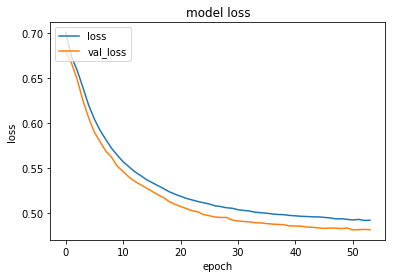

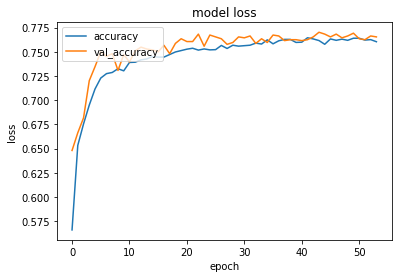

Our accuracy is 75.92%
Our AUC is 81.94%


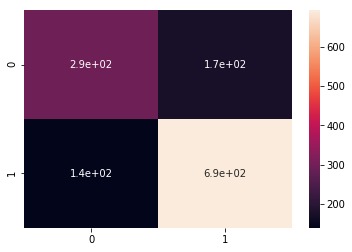

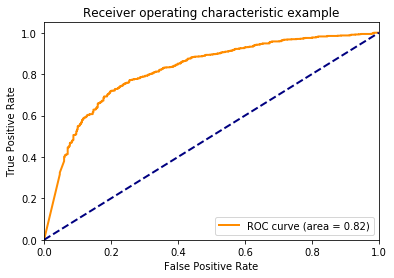

In [11]:
#只用NN
model = ModelCompile()
weights = model.get_weights() 
model, weights = ModelFit(model=model, weights=weights, epochs=150)
Performance(model)

## 只用ES

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1  - BEST Loss: 0.9347  - BEST SCORE: 0.6777 
ES STEPS: 2  - BEST Loss: 0.9347  - BEST SCORE: 0.6777 
ES STEPS: 3  - BEST Loss: 0.9347  - BEST SCORE: 0.6777 
Stop: Reach max_steps
ES STEPS: 1  - BEST Loss: 0.9347  - BEST SCORE: 0.6777 
ES STEPS: 2  - BEST Loss: 0.93

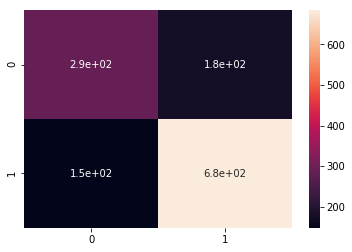

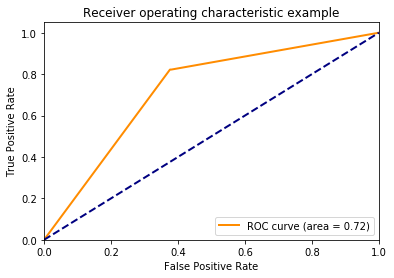

In [17]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  #model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal, _, _ = MyES.run(weights, max_steps=20, verbose = 1)
    
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
Performance(model)

## 版本1：ParentsSize = 15, ChildSize = 100

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1  - BEST Loss: 3.4654  - BEST SCORE: 0.6777 
ES STEPS: 2  - BEST Loss: 3.4654  - BEST SCORE: 0.6777 
ES STEPS: 3  - BEST Loss: 3.4654  - BEST SCORE: 0.6777 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [================

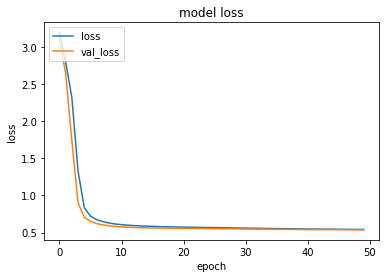

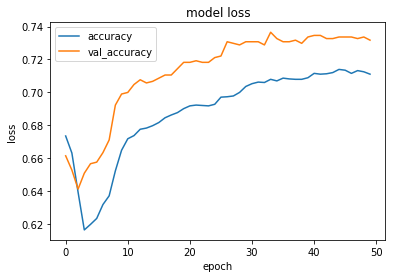

ES STEPS: 1  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 2  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 3  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 4  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 5  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 6  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 7  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 8  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 9  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 10  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 11  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 12  - BEST Loss: 0.5407  - BEST SCORE: 0.7140 
ES STEPS: 13  - BEST Loss: 4.3439  - BEST SCORE: 0.7171 
ES STEPS: 14  - BEST Loss: 4.3439  - BEST SCORE: 0.7171 
ES STEPS: 15  - BEST Loss: 4.4468  - BEST SCORE: 0.7214 
ES STEPS: 16  - BEST Loss: 4.3567  - BEST SCORE: 0.7260 
ES STEPS: 17  - BEST Loss: 4.3232  - BEST SCORE: 0.7296 
ES STEPS: 18  - BEST Loss: 4.2053  - BES

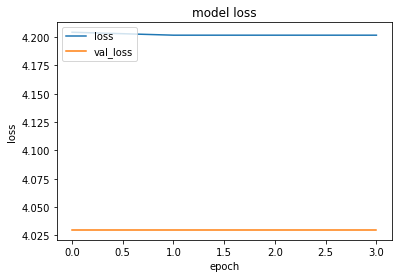

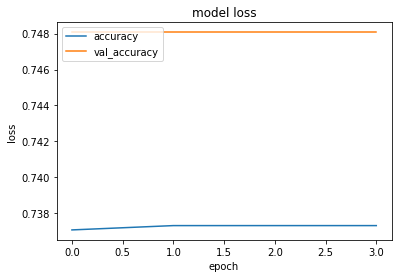

ES STEPS: 1  - BEST Loss: 4.1380  - BEST SCORE: 0.7412 
ES STEPS: 2  - BEST Loss: 4.1380  - BEST SCORE: 0.7412 
ES STEPS: 3  - BEST Loss: 4.1380  - BEST SCORE: 0.7412 
ES STEPS: 4  - BEST Loss: 4.1380  - BEST SCORE: 0.7412 
ES STEPS: 5  - BEST Loss: 4.1380  - BEST SCORE: 0.7412 
ES STEPS: 6  - BEST Loss: 4.0705  - BEST SCORE: 0.7460 
ES STEPS: 7  - BEST Loss: 4.0705  - BEST SCORE: 0.7460 
ES STEPS: 8  - BEST Loss: 4.0615  - BEST SCORE: 0.7465 
ES STEPS: 9  - BEST Loss: 4.0565  - BEST SCORE: 0.7467 
ES STEPS: 10  - BEST Loss: 4.0246  - BEST SCORE: 0.7486 
ES STEPS: 11  - BEST Loss: 4.0218  - BEST SCORE: 0.7489 
ES STEPS: 12  - BEST Loss: 4.0080  - BEST SCORE: 0.7496 
ES STEPS: 13  - BEST Loss: 4.0080  - BEST SCORE: 0.7496 
ES STEPS: 14  - BEST Loss: 4.0080  - BEST SCORE: 0.7496 
ES STEPS: 15  - BEST Loss: 4.0080  - BEST SCORE: 0.7496 
ES STEPS: 16  - BEST Loss: 3.9149  - BEST SCORE: 0.7554 
ES STEPS: 17  - BEST Loss: 3.9149  - BEST SCORE: 0.7554 
ES STEPS: 18  - BEST Loss: 3.9149  - BES

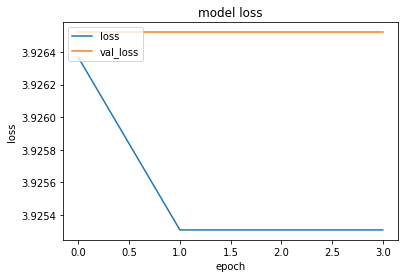

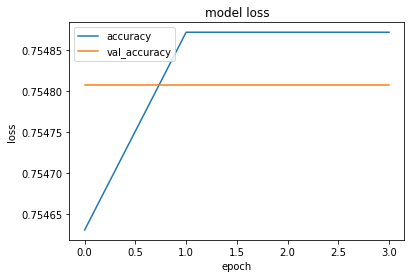

ES STEPS: 1  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 2  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 3  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 4  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 5  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 6  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 7  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 8  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 9  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 10  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 11  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 12  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 13  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 14  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 15  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 16  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 17  - BEST Loss: 3.9186  - BEST SCORE: 0.7554 
ES STEPS: 18  - BEST Loss: 3.9186  - BES

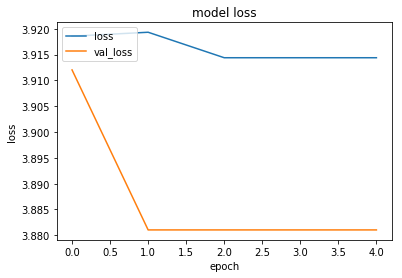

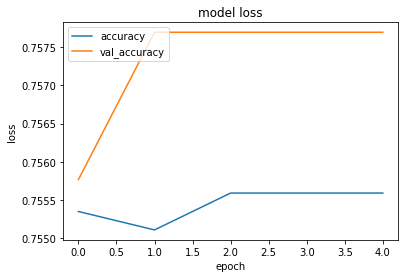

ES STEPS: 1  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 2  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 3  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 4  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 5  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 6  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 7  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 8  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 9  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 10  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 11  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 12  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 13  - BEST Loss: 3.9144  - BEST SCORE: 0.7556 
ES STEPS: 14  - BEST Loss: 3.8741  - BEST SCORE: 0.7580 
ES STEPS: 15  - BEST Loss: 3.8741  - BEST SCORE: 0.7580 
ES STEPS: 16  - BEST Loss: 3.8741  - BEST SCORE: 0.7580 
ES STEPS: 17  - BEST Loss: 3.8741  - BEST SCORE: 0.7580 
ES STEPS: 18  - BEST Loss: 3.8741  - BES

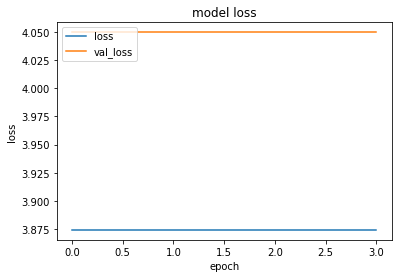

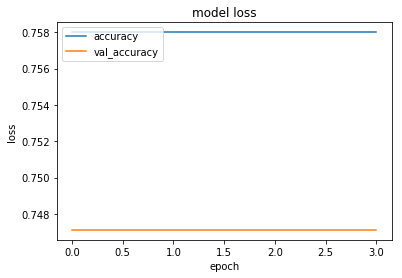

ES STEPS: 1  - BEST Loss: 3.8577  - BEST SCORE: 0.7590 
ES STEPS: 2  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 3  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 4  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 5  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 6  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 7  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 8  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 9  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 10  - BEST Loss: 3.8566  - BEST SCORE: 0.7592 
ES STEPS: 11  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 12  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 13  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 14  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 15  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 16  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 17  - BEST Loss: 3.8521  - BEST SCORE: 0.7594 
ES STEPS: 18  - BEST Loss: 3.8129  - BES

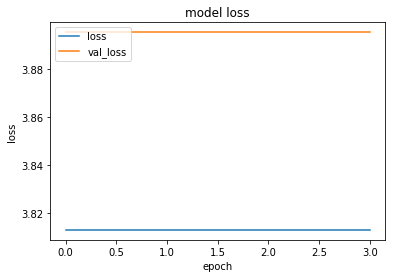

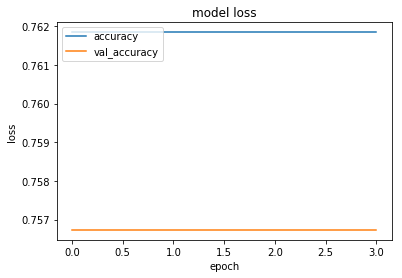

ES STEPS: 1  - BEST Loss: 3.8129  - BEST SCORE: 0.7618 
ES STEPS: 2  - BEST Loss: 3.8129  - BEST SCORE: 0.7618 
ES STEPS: 3  - BEST Loss: 3.8129  - BEST SCORE: 0.7618 
ES STEPS: 4  - BEST Loss: 3.8052  - BEST SCORE: 0.7623 
ES STEPS: 5  - BEST Loss: 3.8052  - BEST SCORE: 0.7623 
ES STEPS: 6  - BEST Loss: 3.8052  - BEST SCORE: 0.7623 
ES STEPS: 7  - BEST Loss: 3.8052  - BEST SCORE: 0.7623 
ES STEPS: 8  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 9  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 10  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 11  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 12  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 13  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 14  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 15  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 16  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 17  - BEST Loss: 3.7913  - BEST SCORE: 0.7628 
ES STEPS: 18  - BEST Loss: 3.7913  - BES

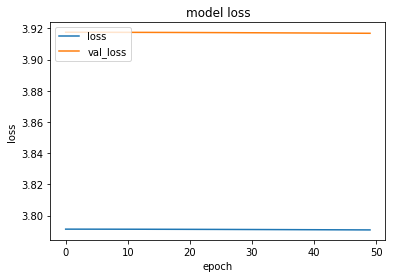

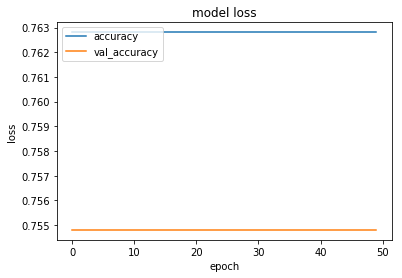

ES STEPS: 1  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 2  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 3  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 4  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 5  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 6  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 7  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 8  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 9  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 10  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 11  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 12  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 13  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 14  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 15  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 16  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 17  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 18  - BEST Loss: 3.7738  - BES

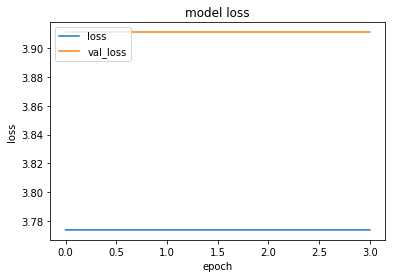

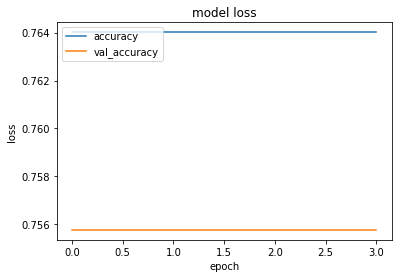

ES STEPS: 1  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 2  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 3  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 4  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 5  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 6  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 7  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 8  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 9  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 10  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 11  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 12  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 13  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 14  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 15  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 16  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 17  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 18  - BEST Loss: 3.7738  - BES

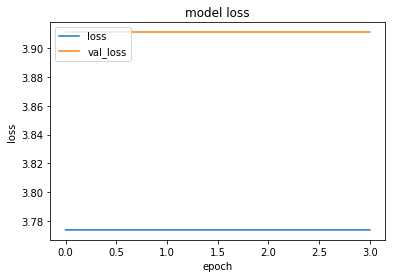

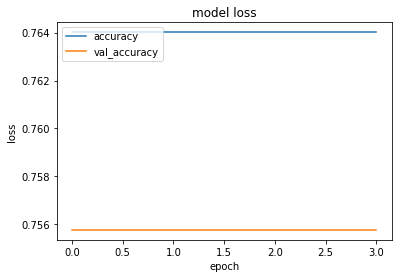

ES STEPS: 1  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 2  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 3  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 4  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 5  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 6  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 7  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 8  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 9  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 10  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 11  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 12  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 13  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 14  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 15  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 16  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 17  - BEST Loss: 3.7738  - BEST SCORE: 0.7640 
ES STEPS: 18  - BEST Loss: 3.7738  - BES

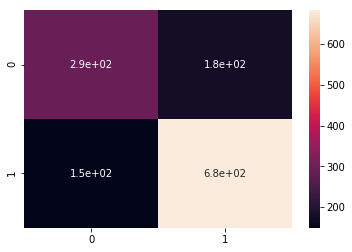

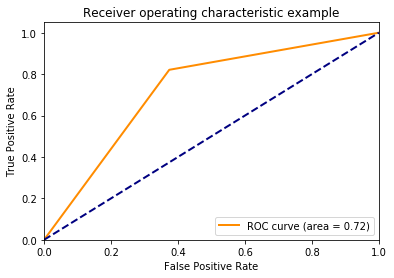

In [18]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal, _, _ = MyES.run(weights, max_steps=20, verbose = 1)
    
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
Performance(model)

## 版本2：ParentsSize = #param x2, ChildSize = ParentsSize*

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1  - BEST Loss: 3.4758  - BEST SCORE: 0.6897 
ES STEPS: 2  - BEST Loss: 0.6382  - BEST SCORE: 0.6930 
ES STEPS: 3  - BEST Loss: 0.6382  - BEST SCORE: 0.6930 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [================

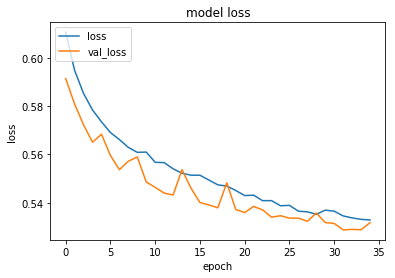

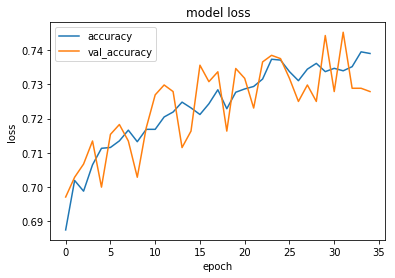

ES STEPS: 1  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 2  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 3  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 4  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 5  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 6  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 7  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 8  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 9  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 10  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 11  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 12  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 13  - BEST Loss: 4.1669  - BEST SCORE: 0.7368 
ES STEPS: 14  - BEST Loss: 4.1977  - BEST SCORE: 0.7373 
ES STEPS: 15  - BEST Loss: 3.8162  - BEST SCORE: 0.7424 
ES STEPS: 16  - BEST Loss: 4.0192  - BEST SCORE: 0.7477 
ES STEPS: 17  - BEST Loss: 4.0192  - BEST SCORE: 0.7477 
ES STEPS: 18  - BEST Loss: 4.0192  - BES

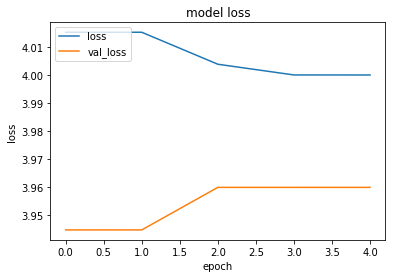

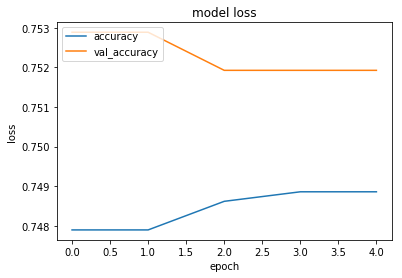

ES STEPS: 1  - BEST Loss: 3.9088  - BEST SCORE: 0.7525 
ES STEPS: 2  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 3  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 4  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 5  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 6  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 7  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 8  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 9  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 10  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 11  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 12  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 13  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 14  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 15  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 16  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 17  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 18  - BEST Loss: 3.8110  - BES

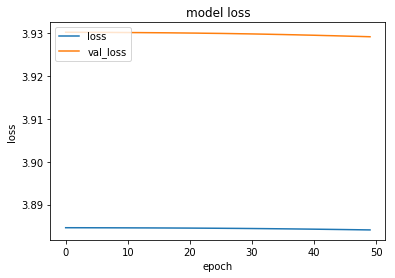

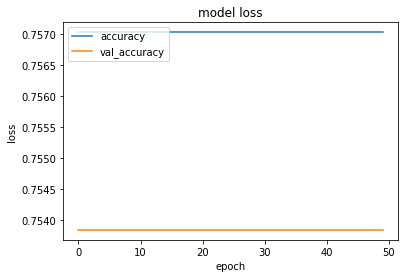

ES STEPS: 1  - BEST Loss: 3.8841  - BEST SCORE: 0.7570 
ES STEPS: 2  - BEST Loss: 3.8841  - BEST SCORE: 0.7570 
ES STEPS: 3  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 4  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 5  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 6  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 7  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 8  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 9  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 10  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 11  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 12  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 13  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 14  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 15  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 16  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 17  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 18  - BEST Loss: 3.8623  - BES

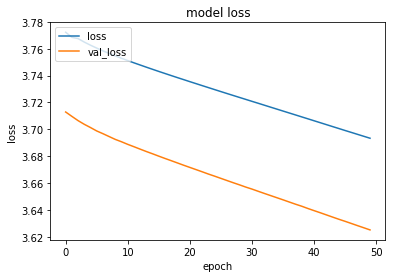

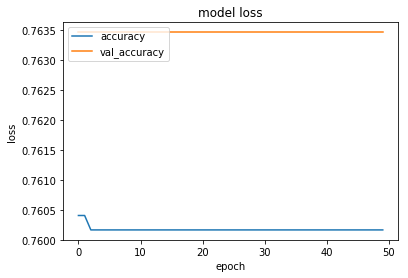

ES STEPS: 1  - BEST Loss: 3.6108  - BEST SCORE: 0.7631 
ES STEPS: 2  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 3  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 4  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 5  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 6  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 7  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 8  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 9  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 10  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 11  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 12  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 13  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 14  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 15  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 16  - BEST Loss: 3.6587  - BEST SCORE: 0.7659 
ES STEPS: 17  - BEST Loss: 3.6587  - BEST SCORE: 0.7659 
ES STEPS: 18  - BEST Loss: 3.7435  - BES

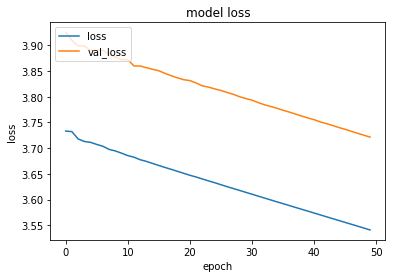

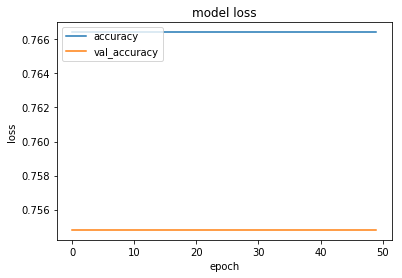

ES STEPS: 1  - BEST Loss: 3.5394  - BEST SCORE: 0.7664 
ES STEPS: 2  - BEST Loss: 3.5394  - BEST SCORE: 0.7664 
ES STEPS: 3  - BEST Loss: 3.2435  - BEST SCORE: 0.7667 
ES STEPS: 4  - BEST Loss: 3.7235  - BEST SCORE: 0.7674 
ES STEPS: 5  - BEST Loss: 3.6551  - BEST SCORE: 0.7676 
ES STEPS: 6  - BEST Loss: 3.6551  - BEST SCORE: 0.7676 
ES STEPS: 7  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 8  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 9  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 10  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 11  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 12  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 13  - BEST Loss: 3.6342  - BEST SCORE: 0.7683 
ES STEPS: 14  - BEST Loss: 3.5480  - BEST SCORE: 0.7686 
ES STEPS: 15  - BEST Loss: 3.5480  - BEST SCORE: 0.7686 
ES STEPS: 16  - BEST Loss: 3.5480  - BEST SCORE: 0.7686 
ES STEPS: 17  - BEST Loss: 3.5480  - BEST SCORE: 0.7686 
ES STEPS: 18  - BEST Loss: 3.5480  - BES

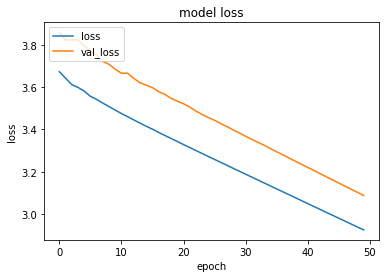

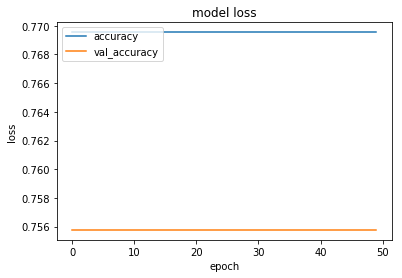

ES STEPS: 1  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 2  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 3  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 4  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 5  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 6  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 7  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 8  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 9  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 10  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 11  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 12  - BEST Loss: 3.0054  - BEST SCORE: 0.7710 
ES STEPS: 13  - BEST Loss: 3.5549  - BEST SCORE: 0.7715 
ES STEPS: 14  - BEST Loss: 3.5549  - BEST SCORE: 0.7715 
ES STEPS: 15  - BEST Loss: 3.5549  - BEST SCORE: 0.7715 
ES STEPS: 16  - BEST Loss: 3.5549  - BEST SCORE: 0.7715 
ES STEPS: 17  - BEST Loss: 3.5549  - BEST SCORE: 0.7715 
ES STEPS: 18  - BEST Loss: 2.7979  - BES

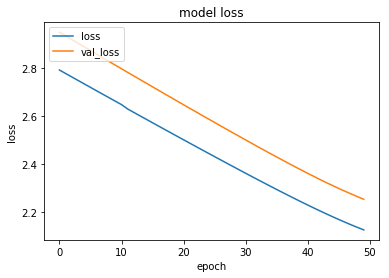

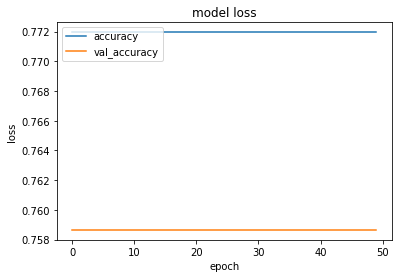

ES STEPS: 1  - BEST Loss: 2.1071  - BEST SCORE: 0.7724 
ES STEPS: 2  - BEST Loss: 2.1071  - BEST SCORE: 0.7724 
ES STEPS: 3  - BEST Loss: 2.1071  - BEST SCORE: 0.7724 
ES STEPS: 4  - BEST Loss: 2.1071  - BEST SCORE: 0.7724 
ES STEPS: 5  - BEST Loss: 2.1071  - BEST SCORE: 0.7724 
ES STEPS: 6  - BEST Loss: 2.1071  - BEST SCORE: 0.7724 
ES STEPS: 7  - BEST Loss: 2.9214  - BEST SCORE: 0.7727 
ES STEPS: 8  - BEST Loss: 2.9214  - BEST SCORE: 0.7727 
ES STEPS: 9  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 10  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 11  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 12  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 13  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 14  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 15  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 16  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 17  - BEST Loss: 2.2771  - BEST SCORE: 0.7729 
ES STEPS: 18  - BEST Loss: 2.2771  - BES

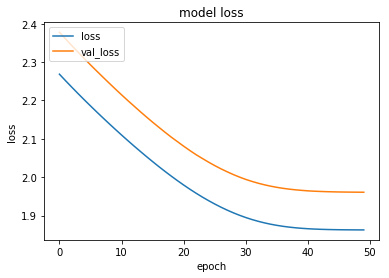

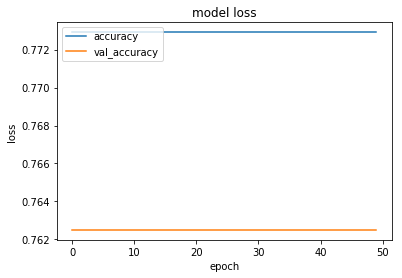

ES STEPS: 1  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 2  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 3  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 4  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 5  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 6  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 7  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 8  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 9  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 10  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 11  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 12  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 13  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 14  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 15  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 16  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 17  - BEST Loss: 1.8624  - BEST SCORE: 0.7729 
ES STEPS: 18  - BEST Loss: 1.8624  - BES

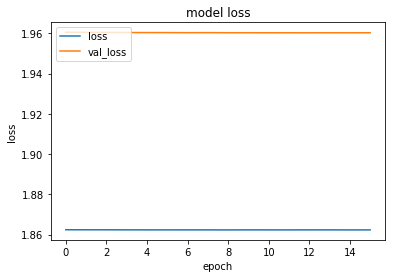

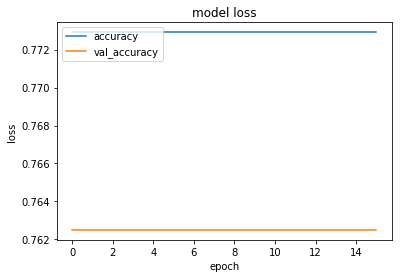

ES STEPS: 1  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 2  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 3  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 4  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 5  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 6  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 7  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 8  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 9  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 10  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 11  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 12  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 13  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 14  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 15  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 16  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 17  - BEST Loss: 1.8623  - BEST SCORE: 0.7729 
ES STEPS: 18  - BEST Loss: 1.8623  - BES

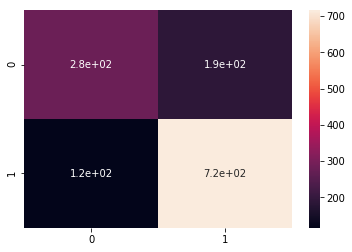

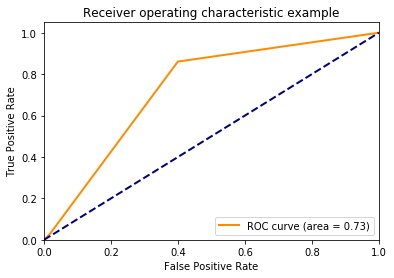

In [20]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = model.count_params()*2, ChildSize = model.count_params()*2*7, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal,_,_ = MyES.run(weights, max_steps=20, verbose = 1)

  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break

Performance(model)

## 版本3：ParentsSize = 15, ChildSize = 100 With MultiPhase

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1  - BEST Loss: 3.9981  - BEST SCORE: 0.6606 
ES STEPS: 2  - BEST Loss: 2.6762  - BEST SCORE: 0.6649 
ES STEPS: 3  - BEST Loss: 4.4648  - BEST SCORE: 0.6844 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1

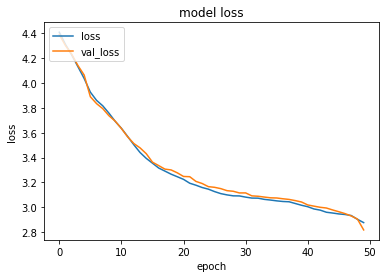

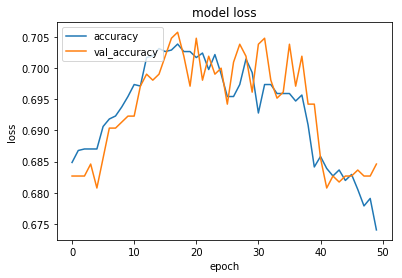

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8262 - acc: 0.6596 - val_loss: 2.9039 - val_acc: 0.6385
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.4803 - acc: 0.6514 - val_loss: 2.6655 - val_acc: 0.6279
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.2863 - acc: 0.6324 - val_loss: 2.4515 - val_acc: 0.6192
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.1178 - acc: 0.6199 - val_loss: 2.1803 - val_acc: 0.6173
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 1.8979 - acc: 0.6139 - val_loss: 1.9068 - val_acc: 0.5990
Epoch 6/50
4157/4157 [==============================] - 0s 74us/step - loss: 1.6943 - acc: 0.5927 - val_loss: 1.8387 - val_acc: 0.5885
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 1.6366 - acc: 0.5848 - val_loss: 1

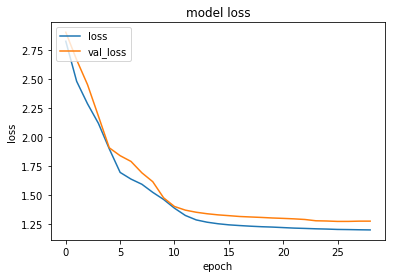

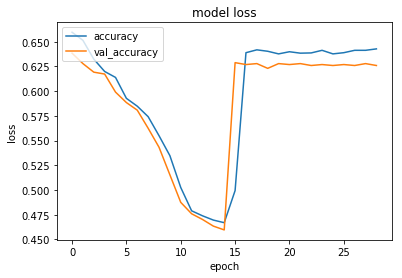

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.8814 - acc: 0.6541 - val_loss: 5.0061 - val_acc: 0.6538
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.7827 - acc: 0.6586 - val_loss: 4.9583 - val_acc: 0.6404
Epoch 3/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.7142 - acc: 0.6613 - val_loss: 4.8903 - val_acc: 0.6490
Epoch 4/50
4157/4157 [==============================] - 0s 79us/step - loss: 4.6751 - acc: 0.6675 - val_loss: 4.8981 - val_acc: 0.6481
Epoch 5/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.6608 - acc: 0.6668 - val_loss: 4.8713 - val_acc: 0.6481
Epoch 6/50
4157/4157 [==============================] - 0s 77us/step - loss: 4.6290 - acc: 0.6692 - val_loss: 4.8653 - val_acc: 0.6548
Epoch 7/50
4157/4157 [==============================] - 0s 79us/step - loss: 4.6024 - acc: 0.6678 - val_loss: 4

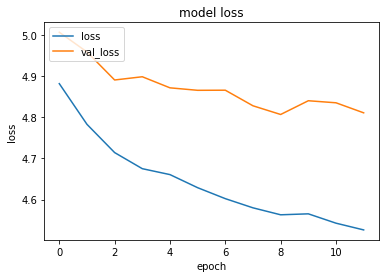

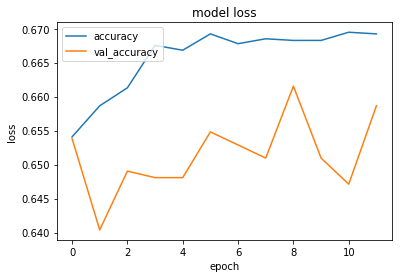

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.6697 - acc: 0.6404 - val_loss: 4.7449 - val_acc: 0.6356
Epoch 2/50
4157/4157 [==============================] - 0s 77us/step - loss: 4.5005 - acc: 0.6384 - val_loss: 4.5447 - val_acc: 0.6327
Epoch 3/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.4227 - acc: 0.6401 - val_loss: 4.5335 - val_acc: 0.6308
Epoch 4/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.3863 - acc: 0.6384 - val_loss: 4.5185 - val_acc: 0.6298
Epoch 5/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.3510 - acc: 0.6375 - val_loss: 4.4615 - val_acc: 0.6250
Epoch 6/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.3187 - acc: 0.6365 - val_loss: 4.4208 - val_acc: 0.6279
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.2862 - acc: 0.6348 - val_loss: 4

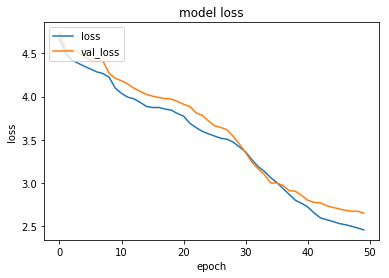

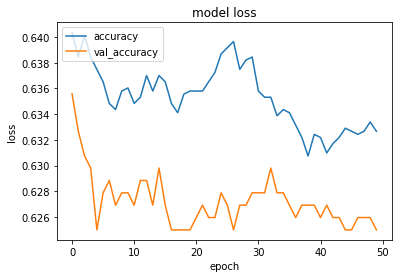

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 5.5635 - acc: 0.6389 - val_loss: 5.6541 - val_acc: 0.6337
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 5.5372 - acc: 0.6413 - val_loss: 5.6484 - val_acc: 0.6308
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 5.5084 - acc: 0.6413 - val_loss: 5.6263 - val_acc: 0.6279
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 5.4407 - acc: 0.6420 - val_loss: 5.5989 - val_acc: 0.6269
Epoch 5/50
4157/4157 [==============================] - 0s 76us/step - loss: 5.4023 - acc: 0.6425 - val_loss: 5.5693 - val_acc: 0.6250
Epoch 6/50
4157/4157 [==============================] - 0s 79us/step - loss: 5.3692 - acc: 0.6418 - val_loss: 5.5366 - val_acc: 0.6288
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 5.3370 - acc: 0.6401 - val_loss: 5

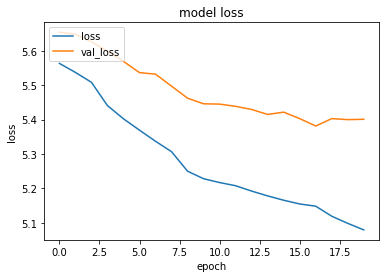

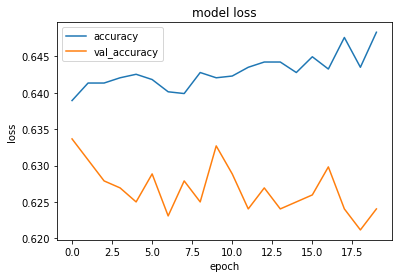

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.8073 - acc: 0.6360 - val_loss: 4.9633 - val_acc: 0.6231
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.7089 - acc: 0.6351 - val_loss: 4.7791 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.4793 - acc: 0.6310 - val_loss: 4.4331 - val_acc: 0.6067
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.1926 - acc: 0.6341 - val_loss: 4.2906 - val_acc: 0.6250
Epoch 5/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.1073 - acc: 0.6298 - val_loss: 4.2252 - val_acc: 0.6096
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.0189 - acc: 0.6276 - val_loss: 4.1789 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.9683 - acc: 0.6310 - val_loss: 4

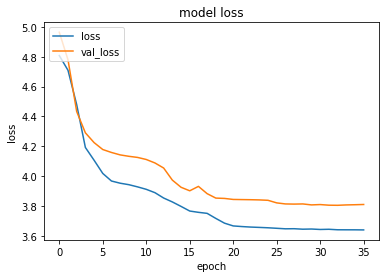

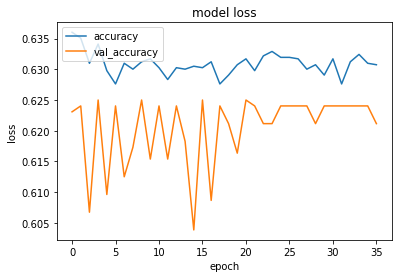

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.5109 - acc: 0.6327 - val_loss: 4.1886 - val_acc: 0.6260
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.1026 - acc: 0.6327 - val_loss: 4.0011 - val_acc: 0.6298
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8915 - acc: 0.6351 - val_loss: 3.9033 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7892 - acc: 0.6331 - val_loss: 3.7485 - val_acc: 0.6269
Epoch 5/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.6384 - acc: 0.6271 - val_loss: 3.4902 - val_acc: 0.6250
Epoch 6/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.3505 - acc: 0.6315 - val_loss: 3.2573 - val_acc: 0.6250
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.2622 - acc: 0.6300 - val_loss: 3

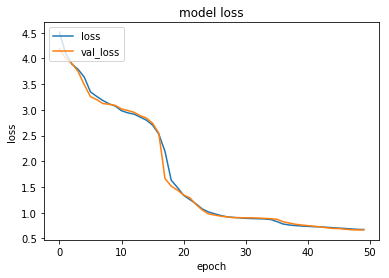

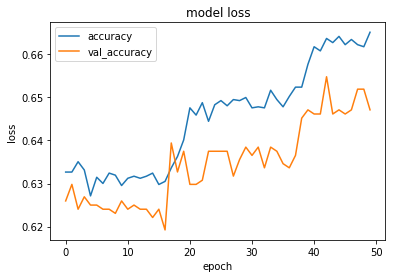

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 76us/step - loss: 5.8292 - acc: 0.6331 - val_loss: 5.9428 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 81us/step - loss: 5.8252 - acc: 0.6331 - val_loss: 5.9555 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 75us/step - loss: 5.8204 - acc: 0.6331 - val_loss: 5.9557 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 75us/step - loss: 5.8180 - acc: 0.6331 - val_loss: 5.9514 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


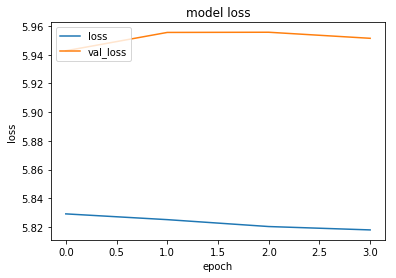

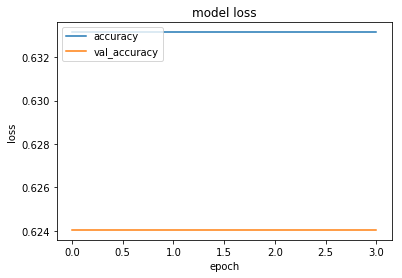

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.3346 - acc: 0.6483 - val_loss: 2.7801 - val_acc: 0.6231
Epoch 2/50
4157/4157 [==============================] - 0s 81us/step - loss: 2.7112 - acc: 0.6529 - val_loss: 2.5068 - val_acc: 0.6596
Epoch 3/50
4157/4157 [==============================] - 0s 77us/step - loss: 2.3804 - acc: 0.6582 - val_loss: 2.2486 - val_acc: 0.6577
Epoch 4/50
4157/4157 [==============================] - 0s 77us/step - loss: 2.2333 - acc: 0.6555 - val_loss: 2.1507 - val_acc: 0.6587
Epoch 5/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.0971 - acc: 0.6579 - val_loss: 2.0513 - val_acc: 0.6356
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.0510 - acc: 0.6538 - val_loss: 1.9876 - val_acc: 0.6337
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.0015 - acc: 0.6567 - val_loss: 1

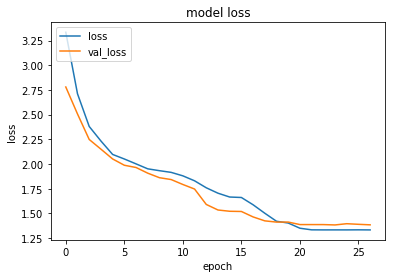

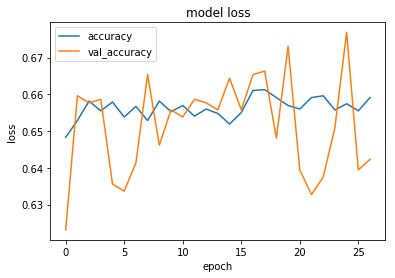

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.5889 - acc: 0.6331 - val_loss: 3.5734 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.4211 - acc: 0.6331 - val_loss: 3.4400 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.3421 - acc: 0.6315 - val_loss: 3.3866 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 72us/step - loss: 3.2611 - acc: 0.6327 - val_loss: 3.2639 - val_acc: 0.6221
Epoch 5/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.1546 - acc: 0.6312 - val_loss: 3.1435 - val_acc: 0.6221
Epoch 6/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.0554 - acc: 0.6317 - val_loss: 3.0669 - val_acc: 0.6231
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.0027 - acc: 0.6324 - val_loss: 3

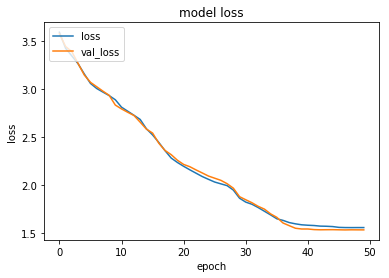

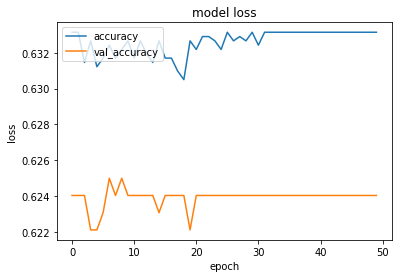

ES STEPS: 1  - BEST Loss: 4.1889  - BEST SCORE: 0.6562 
ES STEPS: 2  - BEST Loss: 4.1889  - BEST SCORE: 0.6562 
ES STEPS: 3  - BEST Loss: 3.5981  - BEST SCORE: 0.6618 
ES STEPS: 4  - BEST Loss: 3.5981  - BEST SCORE: 0.6618 
ES STEPS: 5  - BEST Loss: 3.5981  - BEST SCORE: 0.6618 
ES STEPS: 6  - BEST Loss: 5.0923  - BEST SCORE: 0.6714 
ES STEPS: 7  - BEST Loss: 4.8133  - BEST SCORE: 0.6839 
ES STEPS: 8  - BEST Loss: 4.7826  - BEST SCORE: 0.7000 
ES STEPS: 9  - BEST Loss: 4.5067  - BEST SCORE: 0.7063 
ES STEPS: 10  - BEST Loss: 4.6351  - BEST SCORE: 0.7087 
ES STEPS: 11  - BEST Loss: 4.5074  - BEST SCORE: 0.7178 
ES STEPS: 12  - BEST Loss: 4.2992  - BEST SCORE: 0.7311 
ES STEPS: 13  - BEST Loss: 4.2992  - BEST SCORE: 0.7311 
ES STEPS: 14  - BEST Loss: 4.2992  - BEST SCORE: 0.7311 
ES STEPS: 15  - BEST Loss: 4.2992  - BEST SCORE: 0.7311 
ES STEPS: 16  - BEST Loss: 4.1727  - BEST SCORE: 0.7395 
ES STEPS: 17  - BEST Loss: 4.1727  - BEST SCORE: 0.7395 
ES STEPS: 18  - BEST Loss: 4.1727  - BES

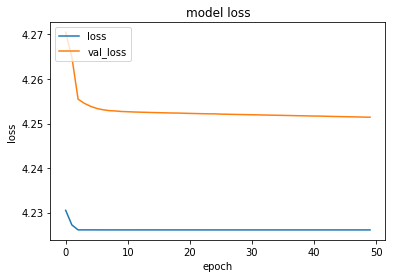

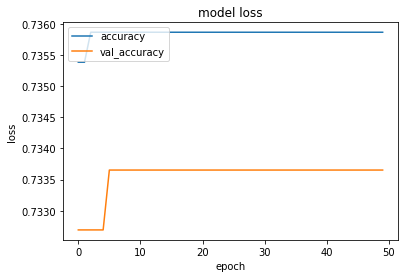

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.2601 - acc: 0.7335 - val_loss: 4.1660 - val_acc: 0.7394
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.2568 - acc: 0.7335 - val_loss: 4.1648 - val_acc: 0.7394
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.2542 - acc: 0.7335 - val_loss: 4.1637 - val_acc: 0.7394
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.2522 - acc: 0.7335 - val_loss: 4.1617 - val_acc: 0.7394
Epoch 5/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.2504 - acc: 0.7335 - val_loss: 4.1593 - val_acc: 0.7394
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.2486 - acc: 0.7335 - val_loss: 4.1586 - val_acc: 0.7394
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.2470 - acc: 0.7335 - val_loss: 4

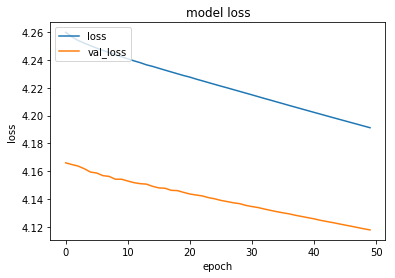

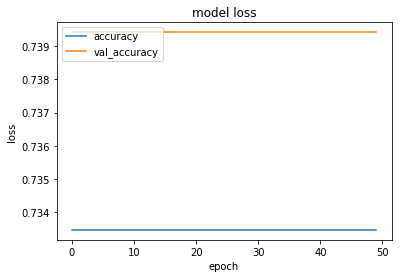

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.2972 - acc: 0.7313 - val_loss: 4.2791 - val_acc: 0.7327
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.3123 - acc: 0.7306 - val_loss: 4.2486 - val_acc: 0.7346
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.3123 - acc: 0.7306 - val_loss: 4.2486 - val_acc: 0.7346
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.3123 - acc: 0.7306 - val_loss: 4.2486 - val_acc: 0.7346
Epoch 5/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.3123 - acc: 0.7306 - val_loss: 4.2486 - val_acc: 0.7346
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


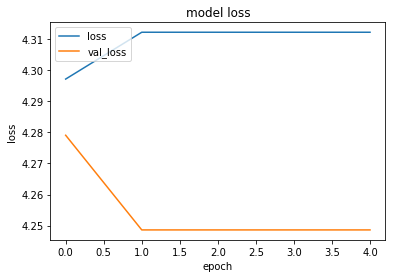

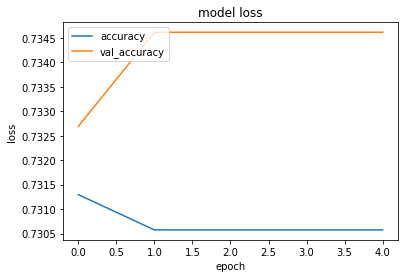

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.2966 - acc: 0.7303 - val_loss: 4.2953 - val_acc: 0.7298
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.2789 - acc: 0.7306 - val_loss: 4.2891 - val_acc: 0.7308
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.2770 - acc: 0.7311 - val_loss: 4.3008 - val_acc: 0.7298
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.2797 - acc: 0.7308 - val_loss: 4.2984 - val_acc: 0.7298
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.2824 - acc: 0.7306 - val_loss: 4.2969 - val_acc: 0.7298
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


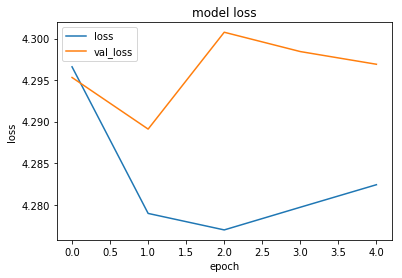

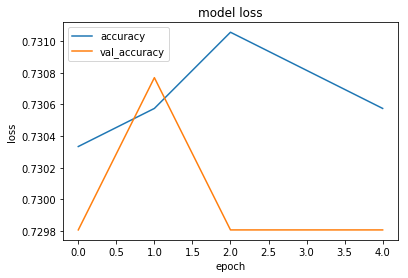

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.3499 - acc: 0.7282 - val_loss: 4.3864 - val_acc: 0.7260
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.3499 - acc: 0.7282 - val_loss: 4.3864 - val_acc: 0.7260
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.3499 - acc: 0.7282 - val_loss: 4.3864 - val_acc: 0.7260
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.3499 - acc: 0.7282 - val_loss: 4.3864 - val_acc: 0.7260
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


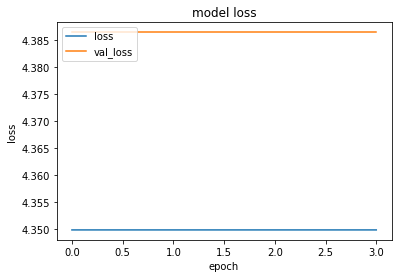

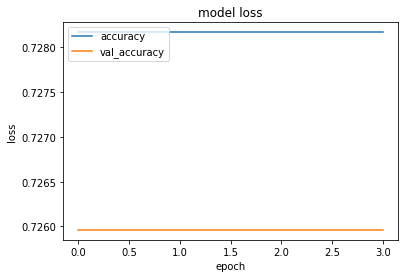

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8337 - acc: 0.7246 - val_loss: 3.7265 - val_acc: 0.7269
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8025 - acc: 0.7246 - val_loss: 3.6995 - val_acc: 0.7269
Epoch 3/50
4157/4157 [==============================] - 0s 72us/step - loss: 3.7803 - acc: 0.7246 - val_loss: 3.6774 - val_acc: 0.7269
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7615 - acc: 0.7246 - val_loss: 3.6583 - val_acc: 0.7269
Epoch 5/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.7448 - acc: 0.7246 - val_loss: 3.6409 - val_acc: 0.7269
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7293 - acc: 0.7246 - val_loss: 3.6245 - val_acc: 0.7269
Epoch 7/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.7148 - acc: 0.7246 - val_loss: 3

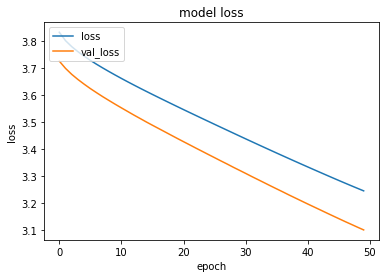

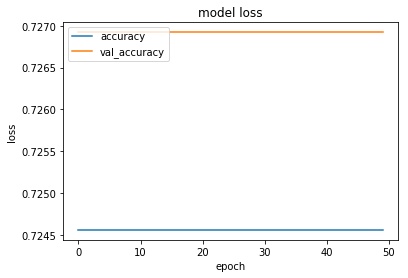

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.4606 - acc: 0.7205 - val_loss: 4.3799 - val_acc: 0.7260
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.4628 - acc: 0.7207 - val_loss: 4.3822 - val_acc: 0.7260
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.4478 - acc: 0.7210 - val_loss: 4.3623 - val_acc: 0.7260
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.4309 - acc: 0.7224 - val_loss: 4.3482 - val_acc: 0.7269
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.4167 - acc: 0.7226 - val_loss: 4.3076 - val_acc: 0.7288
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.4032 - acc: 0.7236 - val_loss: 4.3032 - val_acc: 0.7298
Epoch 7/50
4157/4157 [==============================] - 0s 86us/step - loss: 4.3981 - acc: 0.7236 - val_loss: 4

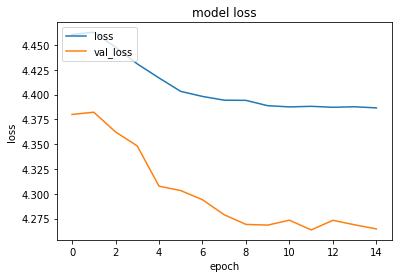

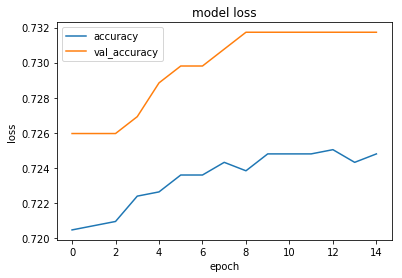

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.4384 - acc: 0.7224 - val_loss: 4.2789 - val_acc: 0.7327
Epoch 2/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.4081 - acc: 0.7236 - val_loss: 4.2943 - val_acc: 0.7317
Epoch 3/50
4157/4157 [==============================] - 0s 94us/step - loss: 4.4057 - acc: 0.7248 - val_loss: 4.2943 - val_acc: 0.7317
Epoch 4/50
4157/4157 [==============================] - 0s 95us/step - loss: 4.4057 - acc: 0.7248 - val_loss: 4.2943 - val_acc: 0.7317
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


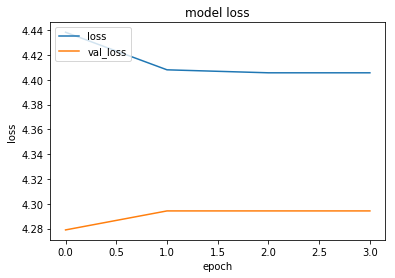

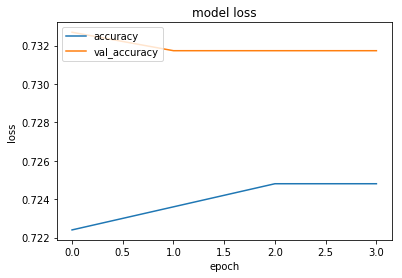

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.3355 - acc: 0.7224 - val_loss: 4.4104 - val_acc: 0.7163
Epoch 2/50
4157/4157 [==============================] - 0s 95us/step - loss: 4.3072 - acc: 0.7231 - val_loss: 4.4083 - val_acc: 0.7163
Epoch 3/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.2927 - acc: 0.7234 - val_loss: 4.3943 - val_acc: 0.7163
Epoch 4/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.2802 - acc: 0.7234 - val_loss: 4.3799 - val_acc: 0.7163
Epoch 5/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.2695 - acc: 0.7234 - val_loss: 4.3679 - val_acc: 0.7163
Epoch 6/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.2599 - acc: 0.7234 - val_loss: 4.3596 - val_acc: 0.7163
Epoch 7/50
4157/4157 [==============================] - 0s 93us/step - loss: 4.2501 - acc: 0.7234 - val_loss: 4

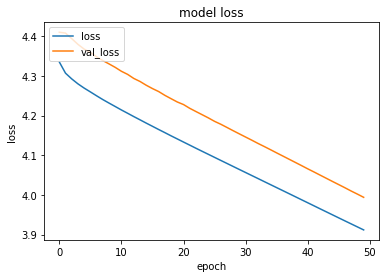

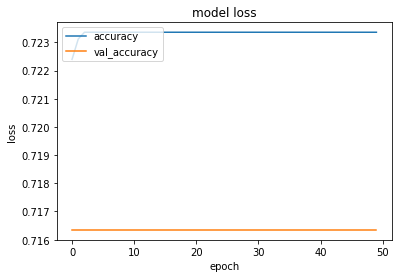

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 97us/step - loss: 4.4454 - acc: 0.7217 - val_loss: 4.4391 - val_acc: 0.7221
Epoch 2/50
4157/4157 [==============================] - 0s 94us/step - loss: 4.4454 - acc: 0.7217 - val_loss: 4.4391 - val_acc: 0.7221
Epoch 3/50
4157/4157 [==============================] - 0s 94us/step - loss: 4.4454 - acc: 0.7217 - val_loss: 4.4391 - val_acc: 0.7221
Epoch 4/50
4157/4157 [==============================] - 0s 96us/step - loss: 4.4454 - acc: 0.7217 - val_loss: 4.4391 - val_acc: 0.7221
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


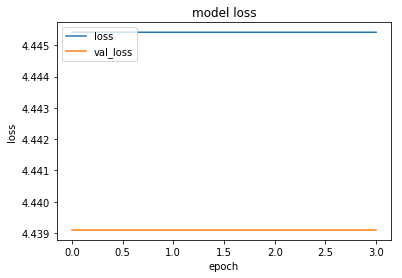

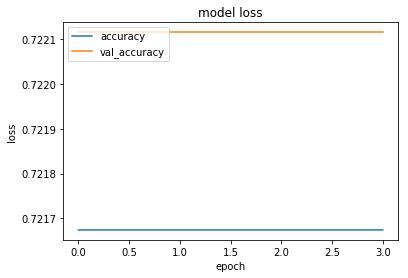

ES STEPS: 1  - BEST Loss: 4.1689  - BEST SCORE: 0.7395 
ES STEPS: 2  - BEST Loss: 4.0775  - BEST SCORE: 0.7438 
ES STEPS: 3  - BEST Loss: 4.0976  - BEST SCORE: 0.7440 
ES STEPS: 4  - BEST Loss: 4.0976  - BEST SCORE: 0.7440 
ES STEPS: 5  - BEST Loss: 4.0976  - BEST SCORE: 0.7440 
ES STEPS: 6  - BEST Loss: 4.0802  - BEST SCORE: 0.7452 
ES STEPS: 7  - BEST Loss: 4.0369  - BEST SCORE: 0.7477 
ES STEPS: 8  - BEST Loss: 4.0369  - BEST SCORE: 0.7477 
ES STEPS: 9  - BEST Loss: 4.0369  - BEST SCORE: 0.7477 
ES STEPS: 10  - BEST Loss: 4.0076  - BEST SCORE: 0.7496 
ES STEPS: 11  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 12  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 13  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 14  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 15  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 16  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 17  - BEST Loss: 4.0029  - BEST SCORE: 0.7501 
ES STEPS: 18  - BEST Loss: 4.0029  - BES

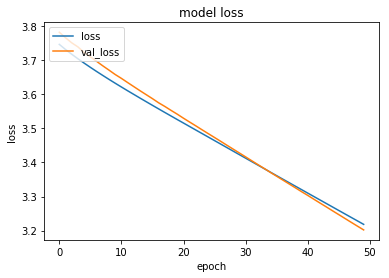

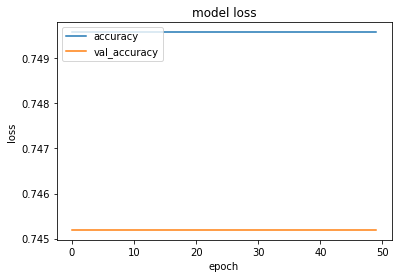

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 4.0182 - acc: 0.7489 - val_loss: 4.1703 - val_acc: 0.7394
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.0182 - acc: 0.7489 - val_loss: 4.1703 - val_acc: 0.7394
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.0182 - acc: 0.7489 - val_loss: 4.1703 - val_acc: 0.7394
Epoch 4/50
4157/4157 [==============================] - 0s 72us/step - loss: 4.0182 - acc: 0.7489 - val_loss: 4.1703 - val_acc: 0.7394
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


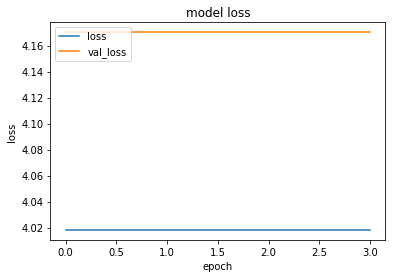

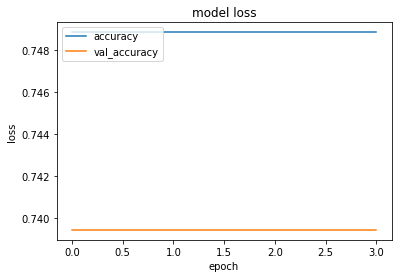

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 77us/step - loss: 4.0547 - acc: 0.7465 - val_loss: 3.9242 - val_acc: 0.7548
Epoch 2/50
4157/4157 [==============================] - 0s 80us/step - loss: 4.0545 - acc: 0.7467 - val_loss: 3.9090 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.0546 - acc: 0.7467 - val_loss: 3.9090 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.0545 - acc: 0.7467 - val_loss: 3.9089 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 4.0546 - acc: 0.7467 - val_loss: 3.9090 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 4.0546 - acc: 0.7467 - val_loss: 3.9089 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 4.0546 - acc: 0.7467 - val_loss: 3

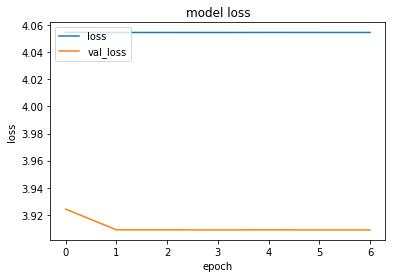

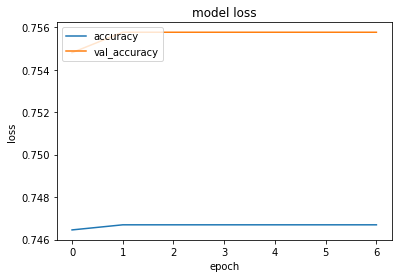

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8625 - acc: 0.7462 - val_loss: 3.9897 - val_acc: 0.7394
Epoch 2/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.8603 - acc: 0.7462 - val_loss: 3.9877 - val_acc: 0.7394
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8581 - acc: 0.7462 - val_loss: 3.9857 - val_acc: 0.7394
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8559 - acc: 0.7462 - val_loss: 3.9836 - val_acc: 0.7394
Epoch 5/50
4157/4157 [==============================] - 0s 72us/step - loss: 3.8536 - acc: 0.7462 - val_loss: 3.9816 - val_acc: 0.7394
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.8513 - acc: 0.7462 - val_loss: 3.9795 - val_acc: 0.7394
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.8489 - acc: 0.7462 - val_loss: 3

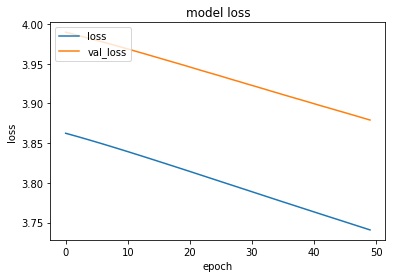

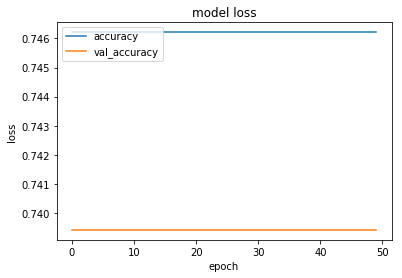

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 94us/step - loss: 4.0844 - acc: 0.7450 - val_loss: 4.1135 - val_acc: 0.7433
Epoch 2/50
4157/4157 [==============================] - 0s 79us/step - loss: 4.0844 - acc: 0.7450 - val_loss: 4.1135 - val_acc: 0.7433
Epoch 3/50
4157/4157 [==============================] - 0s 89us/step - loss: 4.0844 - acc: 0.7450 - val_loss: 4.1135 - val_acc: 0.7433
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 4.0844 - acc: 0.7450 - val_loss: 4.1135 - val_acc: 0.7433
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


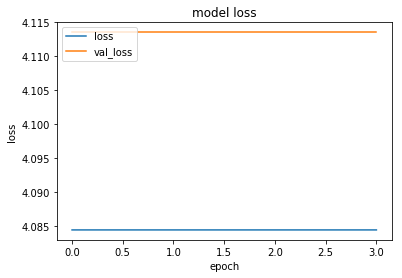

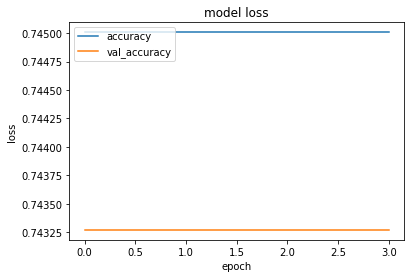

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 4.0837 - acc: 0.7450 - val_loss: 4.0037 - val_acc: 0.7500
Epoch 2/50
4157/4157 [==============================] - 0s 107us/step - loss: 4.0837 - acc: 0.7450 - val_loss: 4.0037 - val_acc: 0.7500
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 4.0837 - acc: 0.7450 - val_loss: 4.0037 - val_acc: 0.7500
Epoch 4/50
4157/4157 [==============================] - 0s 108us/step - loss: 4.0837 - acc: 0.7450 - val_loss: 4.0037 - val_acc: 0.7500
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


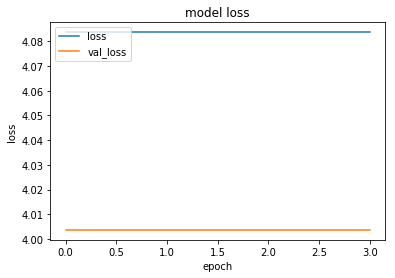

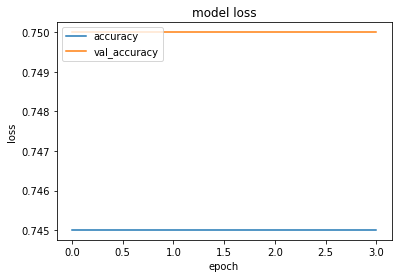

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 108us/step - loss: 4.0858 - acc: 0.7448 - val_loss: 4.1875 - val_acc: 0.7385
Epoch 2/50
4157/4157 [==============================] - 0s 108us/step - loss: 4.0858 - acc: 0.7448 - val_loss: 4.1875 - val_acc: 0.7385
Epoch 3/50
4157/4157 [==============================] - 0s 108us/step - loss: 4.0858 - acc: 0.7448 - val_loss: 4.1875 - val_acc: 0.7385
Epoch 4/50
4157/4157 [==============================] - 0s 111us/step - loss: 4.0858 - acc: 0.7448 - val_loss: 4.1875 - val_acc: 0.7385
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


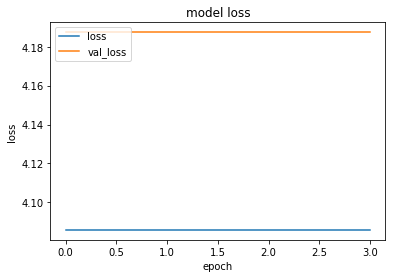

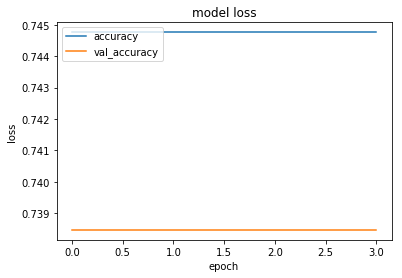

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 107us/step - loss: 4.0841 - acc: 0.7448 - val_loss: 4.0168 - val_acc: 0.7490
Epoch 2/50
4157/4157 [==============================] - 0s 110us/step - loss: 4.0841 - acc: 0.7448 - val_loss: 4.0168 - val_acc: 0.7490
Epoch 3/50
4157/4157 [==============================] - 0s 115us/step - loss: 4.0841 - acc: 0.7448 - val_loss: 4.0168 - val_acc: 0.7490
Epoch 4/50
4157/4157 [==============================] - 0s 114us/step - loss: 4.0841 - acc: 0.7448 - val_loss: 4.0168 - val_acc: 0.7490
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


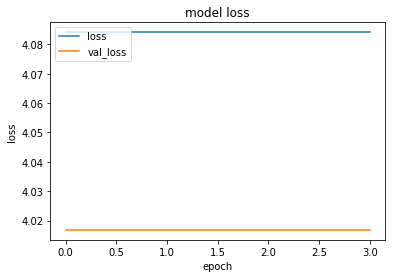

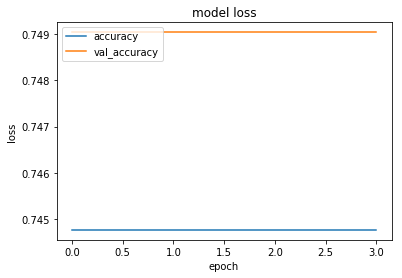

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 116us/step - loss: 4.1003 - acc: 0.7440 - val_loss: 3.9899 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 4.1003 - acc: 0.7440 - val_loss: 3.9899 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 110us/step - loss: 4.1003 - acc: 0.7440 - val_loss: 3.9899 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 109us/step - loss: 4.1003 - acc: 0.7440 - val_loss: 3.9899 - val_acc: 0.7510
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


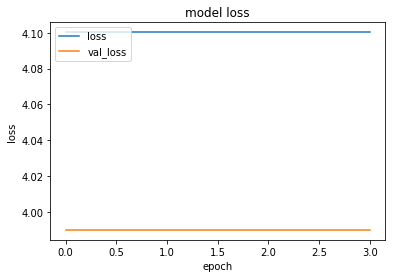

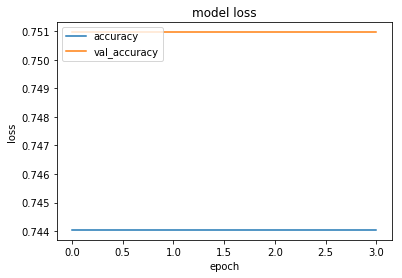

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 4.0996 - acc: 0.7438 - val_loss: 4.1859 - val_acc: 0.7385
Epoch 2/50
4157/4157 [==============================] - 0s 102us/step - loss: 4.0996 - acc: 0.7438 - val_loss: 4.1859 - val_acc: 0.7385
Epoch 3/50
4157/4157 [==============================] - 0s 95us/step - loss: 4.0996 - acc: 0.7438 - val_loss: 4.1859 - val_acc: 0.7385
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 4.0996 - acc: 0.7438 - val_loss: 4.1859 - val_acc: 0.7385
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


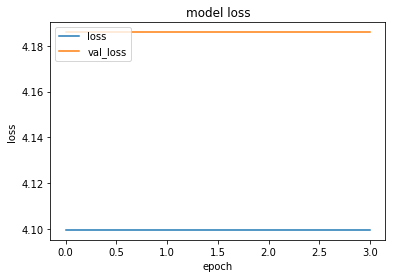

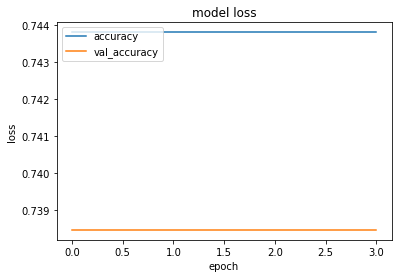

ES STEPS: 1  - BEST Loss: 4.0172  - BEST SCORE: 0.7489 
ES STEPS: 2  - BEST Loss: 4.0172  - BEST SCORE: 0.7489 
ES STEPS: 3  - BEST Loss: 3.9962  - BEST SCORE: 0.7503 
ES STEPS: 4  - BEST Loss: 3.9962  - BEST SCORE: 0.7503 
ES STEPS: 5  - BEST Loss: 3.7806  - BEST SCORE: 0.7539 
ES STEPS: 6  - BEST Loss: 3.7806  - BEST SCORE: 0.7539 
ES STEPS: 7  - BEST Loss: 3.7806  - BEST SCORE: 0.7539 
ES STEPS: 8  - BEST Loss: 3.8544  - BEST SCORE: 0.7554 
ES STEPS: 9  - BEST Loss: 3.8675  - BEST SCORE: 0.7558 
ES STEPS: 10  - BEST Loss: 3.8675  - BEST SCORE: 0.7558 
ES STEPS: 11  - BEST Loss: 3.8675  - BEST SCORE: 0.7558 
ES STEPS: 12  - BEST Loss: 3.8675  - BEST SCORE: 0.7558 
ES STEPS: 13  - BEST Loss: 3.8729  - BEST SCORE: 0.7573 
ES STEPS: 14  - BEST Loss: 3.8729  - BEST SCORE: 0.7573 
ES STEPS: 15  - BEST Loss: 3.8729  - BEST SCORE: 0.7573 
ES STEPS: 16  - BEST Loss: 3.8729  - BEST SCORE: 0.7573 
ES STEPS: 17  - BEST Loss: 3.8595  - BEST SCORE: 0.7587 
ES STEPS: 18  - BEST Loss: 3.8442  - BES

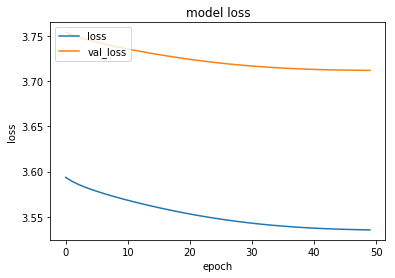

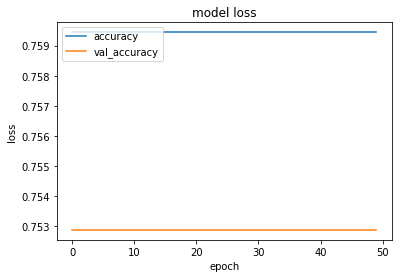

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8702 - acc: 0.7582 - val_loss: 3.9413 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 107us/step - loss: 3.8702 - acc: 0.7582 - val_loss: 3.9413 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 109us/step - loss: 3.8702 - acc: 0.7582 - val_loss: 3.9413 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 109us/step - loss: 3.8702 - acc: 0.7582 - val_loss: 3.9413 - val_acc: 0.7538
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


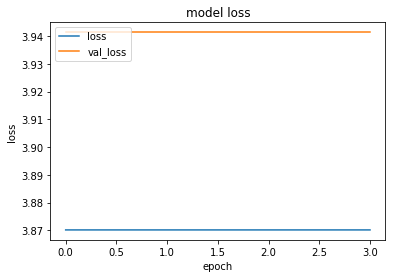

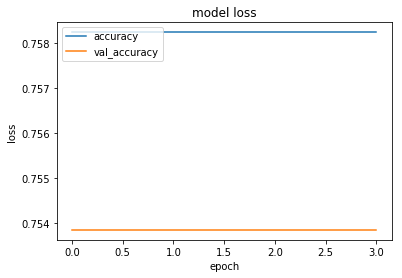

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8730 - acc: 0.7580 - val_loss: 3.9407 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 109us/step - loss: 3.8730 - acc: 0.7580 - val_loss: 3.9407 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 110us/step - loss: 3.8730 - acc: 0.7580 - val_loss: 3.9407 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 108us/step - loss: 3.8730 - acc: 0.7580 - val_loss: 3.9407 - val_acc: 0.7538
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


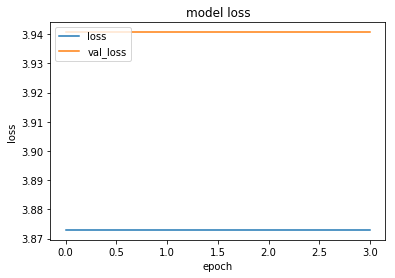

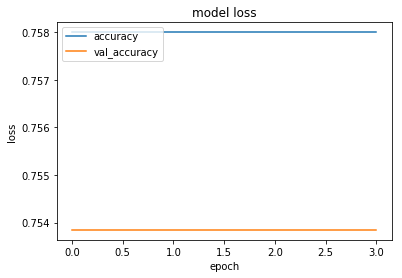

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 91us/step - loss: 3.8387 - acc: 0.7580 - val_loss: 3.8759 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 97us/step - loss: 3.8386 - acc: 0.7580 - val_loss: 3.8758 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 3.8385 - acc: 0.7580 - val_loss: 3.8756 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 114us/step - loss: 3.8384 - acc: 0.7580 - val_loss: 3.8754 - val_acc: 0.7538
Epoch 5/50
4157/4157 [==============================] - 0s 111us/step - loss: 3.8384 - acc: 0.7580 - val_loss: 3.8752 - val_acc: 0.7538
Epoch 6/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8382 - acc: 0.7580 - val_loss: 3.8751 - val_acc: 0.7538
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8381 - acc: 0.7580 - val_lo

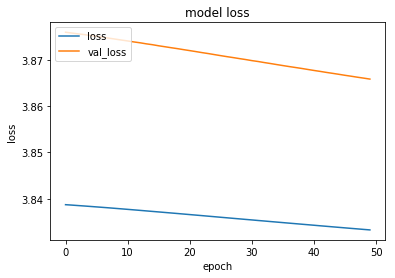

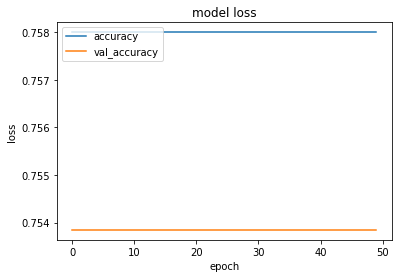

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 97us/step - loss: 3.8467 - acc: 0.7573 - val_loss: 3.8905 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.8466 - acc: 0.7573 - val_loss: 3.8904 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8466 - acc: 0.7573 - val_loss: 3.8903 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8466 - acc: 0.7573 - val_loss: 3.8902 - val_acc: 0.7510
Epoch 5/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8466 - acc: 0.7573 - val_loss: 3.8901 - val_acc: 0.7510
Epoch 6/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8465 - acc: 0.7573 - val_loss: 3.8900 - val_acc: 0.7510
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8465 - acc: 0.7573 - val_lo

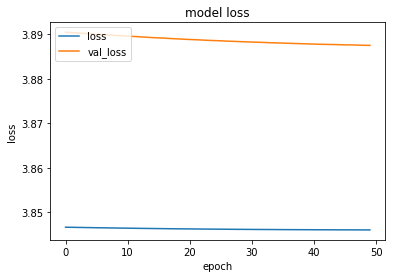

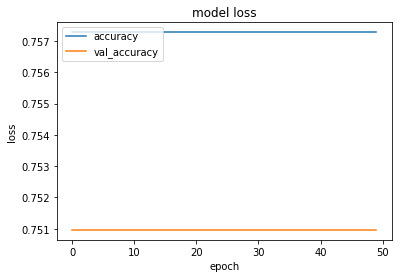

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8329 - acc: 0.7575 - val_loss: 3.9152 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8321 - acc: 0.7575 - val_loss: 3.9143 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8314 - acc: 0.7575 - val_loss: 3.9136 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8307 - acc: 0.7575 - val_loss: 3.9129 - val_acc: 0.7519
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8302 - acc: 0.7575 - val_loss: 3.9122 - val_acc: 0.7519
Epoch 6/50
4157/4157 [==============================] - 0s 108us/step - loss: 3.8296 - acc: 0.7575 - val_loss: 3.9117 - val_acc: 0.7519
Epoch 7/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8291 - acc: 0.7575 - val_

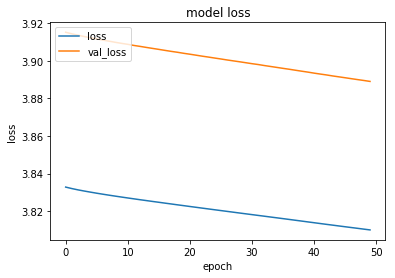

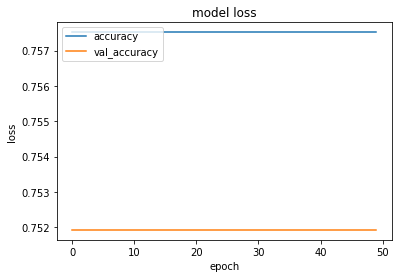

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8848 - acc: 0.7573 - val_loss: 3.9720 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8848 - acc: 0.7573 - val_loss: 3.9720 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8848 - acc: 0.7573 - val_loss: 3.9720 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8848 - acc: 0.7573 - val_loss: 3.9720 - val_acc: 0.7519
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


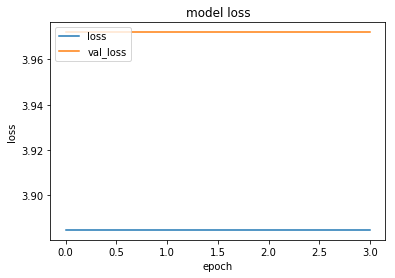

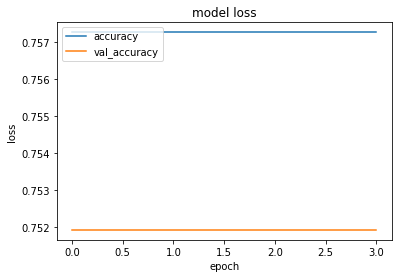

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8933 - acc: 0.7568 - val_loss: 3.9417 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8933 - acc: 0.7568 - val_loss: 3.9417 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8933 - acc: 0.7568 - val_loss: 3.9417 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8933 - acc: 0.7568 - val_loss: 3.9417 - val_acc: 0.7538
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


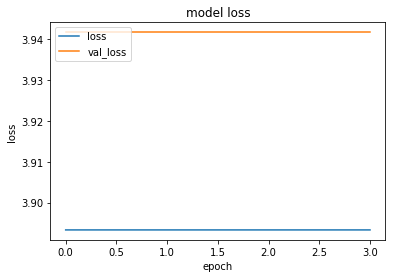

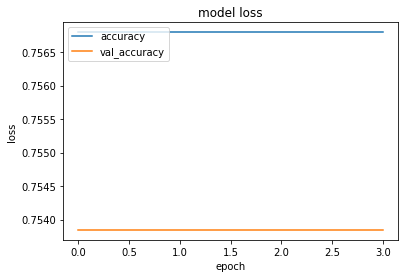

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8979 - acc: 0.7566 - val_loss: 3.9270 - val_acc: 0.7548
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8979 - acc: 0.7566 - val_loss: 3.9270 - val_acc: 0.7548
Epoch 3/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8979 - acc: 0.7566 - val_loss: 3.9270 - val_acc: 0.7548
Epoch 4/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8979 - acc: 0.7566 - val_loss: 3.9270 - val_acc: 0.7548
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


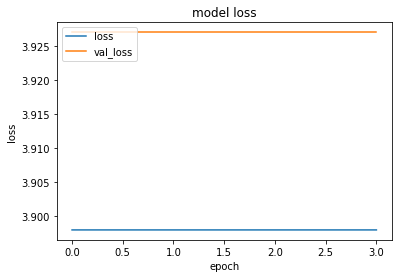

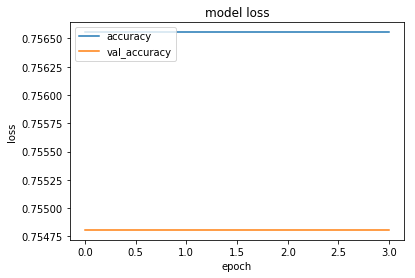

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8963 - acc: 0.7566 - val_loss: 4.0171 - val_acc: 0.7490
Epoch 2/50
4157/4157 [==============================] - 0s 107us/step - loss: 3.8963 - acc: 0.7566 - val_loss: 4.0171 - val_acc: 0.7490
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8963 - acc: 0.7566 - val_loss: 4.0171 - val_acc: 0.7490
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8963 - acc: 0.7566 - val_loss: 4.0171 - val_acc: 0.7490
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


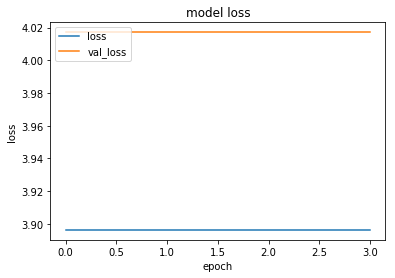

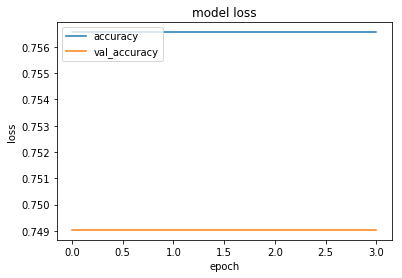

ES STEPS: 1  - BEST Loss: 3.8501  - BEST SCORE: 0.7592 
ES STEPS: 2  - BEST Loss: 3.8501  - BEST SCORE: 0.7592 
ES STEPS: 3  - BEST Loss: 3.8501  - BEST SCORE: 0.7592 
ES STEPS: 4  - BEST Loss: 3.8501  - BEST SCORE: 0.7592 
ES STEPS: 5  - BEST Loss: 3.8501  - BEST SCORE: 0.7592 
ES STEPS: 6  - BEST Loss: 3.3269  - BEST SCORE: 0.7604 
ES STEPS: 7  - BEST Loss: 3.3269  - BEST SCORE: 0.7604 
ES STEPS: 8  - BEST Loss: 3.3269  - BEST SCORE: 0.7604 
ES STEPS: 9  - BEST Loss: 3.3269  - BEST SCORE: 0.7604 
ES STEPS: 10  - BEST Loss: 3.3269  - BEST SCORE: 0.7604 
ES STEPS: 11  - BEST Loss: 2.5686  - BEST SCORE: 0.7611 
ES STEPS: 12  - BEST Loss: 2.6525  - BEST SCORE: 0.7618 
ES STEPS: 13  - BEST Loss: 2.6525  - BEST SCORE: 0.7618 
ES STEPS: 14  - BEST Loss: 3.3159  - BEST SCORE: 0.7623 
ES STEPS: 15  - BEST Loss: 3.1595  - BEST SCORE: 0.7628 
ES STEPS: 16  - BEST Loss: 3.1595  - BEST SCORE: 0.7628 
ES STEPS: 17  - BEST Loss: 3.1595  - BEST SCORE: 0.7628 
ES STEPS: 18  - BEST Loss: 3.1595  - BES

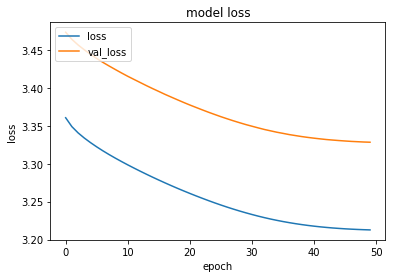

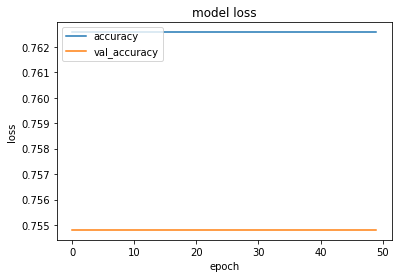

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.1504 - acc: 0.7614 - val_loss: 3.3895 - val_acc: 0.7529
Epoch 2/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.1499 - acc: 0.7614 - val_loss: 3.3890 - val_acc: 0.7529
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.1496 - acc: 0.7614 - val_loss: 3.3887 - val_acc: 0.7529
Epoch 4/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.1493 - acc: 0.7614 - val_loss: 3.3883 - val_acc: 0.7529
Epoch 5/50
4157/4157 [==============================] - 0s 101us/step - loss: 3.1491 - acc: 0.7614 - val_loss: 3.3881 - val_acc: 0.7529
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.1490 - acc: 0.7614 - val_loss: 3.3879 - val_acc: 0.7529
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.1488 - acc: 0.7614 - val_

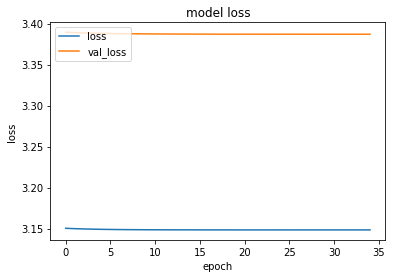

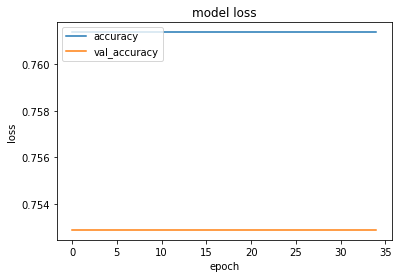

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 92us/step - loss: 2.7925 - acc: 0.7609 - val_loss: 2.7775 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.7678 - acc: 0.7609 - val_loss: 2.7581 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 94us/step - loss: 2.7413 - acc: 0.7614 - val_loss: 2.7415 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.7280 - acc: 0.7614 - val_loss: 2.7272 - val_acc: 0.7519
Epoch 5/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.7161 - acc: 0.7614 - val_loss: 2.7149 - val_acc: 0.7519
Epoch 6/50
4157/4157 [==============================] - 0s 92us/step - loss: 2.7054 - acc: 0.7614 - val_loss: 2.7028 - val_acc: 0.7519
Epoch 7/50
4157/4157 [==============================] - 0s 99us/step - loss: 2.6957 - acc: 0.7614 - val_loss: 2

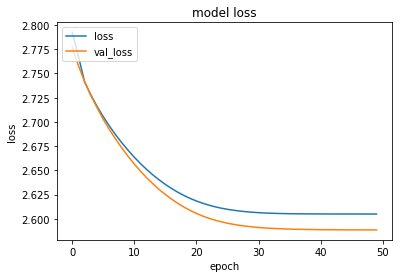

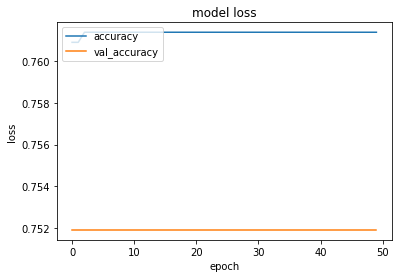

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8222 - acc: 0.7609 - val_loss: 4.0489 - val_acc: 0.7462
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8222 - acc: 0.7609 - val_loss: 4.0489 - val_acc: 0.7462
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.8222 - acc: 0.7609 - val_loss: 4.0489 - val_acc: 0.7462
Epoch 4/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8222 - acc: 0.7609 - val_loss: 4.0489 - val_acc: 0.7462
Epoch 5/50
4157/4157 [==============================] - 0s 103us/step - loss: 3.8222 - acc: 0.7609 - val_loss: 4.0489 - val_acc: 0.7462
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.8222 - acc: 0.7609 - val_loss: 4.0489 - val_acc: 0.7462
Epoch 7/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.8222 - acc: 0.7609 - val_

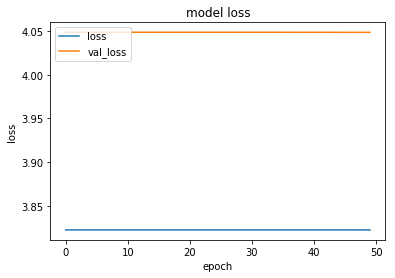

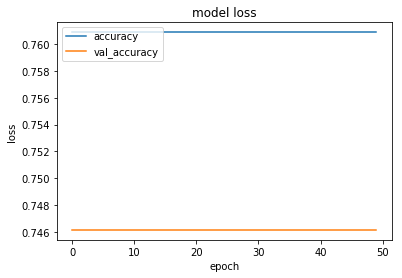

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 2.5663 - acc: 0.7609 - val_loss: 2.5285 - val_acc: 0.7625
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.5592 - acc: 0.7609 - val_loss: 2.5251 - val_acc: 0.7625
Epoch 3/50
4157/4157 [==============================] - 0s 106us/step - loss: 2.5567 - acc: 0.7609 - val_loss: 2.5236 - val_acc: 0.7625
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 2.5554 - acc: 0.7609 - val_loss: 2.5228 - val_acc: 0.7625
Epoch 5/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.5547 - acc: 0.7609 - val_loss: 2.5223 - val_acc: 0.7625
Epoch 6/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.5542 - acc: 0.7609 - val_loss: 2.5221 - val_acc: 0.7625
Epoch 7/50
4157/4157 [==============================] - 0s 109us/step - loss: 2.5540 - acc: 0.7609 - val_

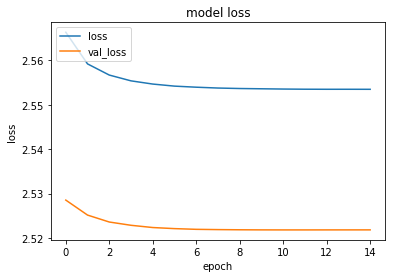

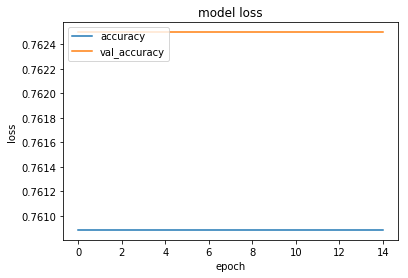

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.9791 - acc: 0.7606 - val_loss: 2.9587 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 112us/step - loss: 2.9654 - acc: 0.7606 - val_loss: 2.9440 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 114us/step - loss: 2.9533 - acc: 0.7606 - val_loss: 2.9306 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 2.9422 - acc: 0.7606 - val_loss: 2.9185 - val_acc: 0.7538
Epoch 5/50
4157/4157 [==============================] - 0s 109us/step - loss: 2.9320 - acc: 0.7606 - val_loss: 2.9071 - val_acc: 0.7538
Epoch 6/50
4157/4157 [==============================] - 0s 87us/step - loss: 2.9223 - acc: 0.7606 - val_loss: 2.8964 - val_acc: 0.7538
Epoch 7/50
4157/4157 [==============================] - 0s 94us/step - loss: 2.9131 - acc: 0.7606 - val_lo

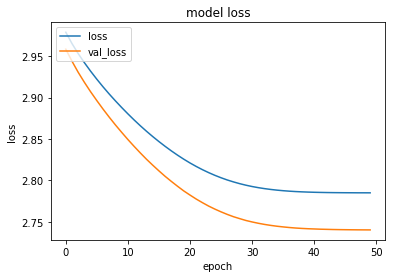

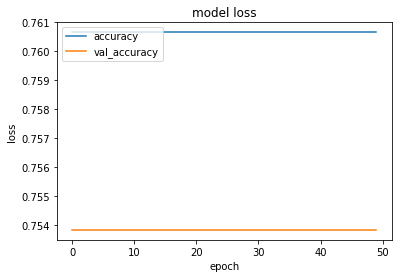

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 112us/step - loss: 3.6568 - acc: 0.7604 - val_loss: 3.7972 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 108us/step - loss: 3.6561 - acc: 0.7604 - val_loss: 3.7965 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.6554 - acc: 0.7604 - val_loss: 3.7957 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.6547 - acc: 0.7604 - val_loss: 3.7949 - val_acc: 0.7510
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.6540 - acc: 0.7604 - val_loss: 3.7942 - val_acc: 0.7510
Epoch 6/50
4157/4157 [==============================] - 0s 106us/step - loss: 3.6532 - acc: 0.7604 - val_loss: 3.7933 - val_acc: 0.7510
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.6524 - acc: 0.7604 - val_

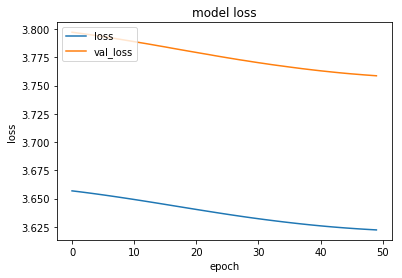

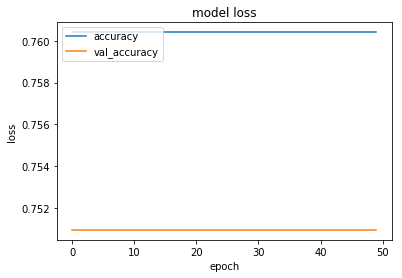

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 109us/step - loss: 3.6980 - acc: 0.7602 - val_loss: 3.8463 - val_acc: 0.7462
Epoch 2/50
4157/4157 [==============================] - 0s 111us/step - loss: 3.6968 - acc: 0.7602 - val_loss: 3.8445 - val_acc: 0.7462
Epoch 3/50
4157/4157 [==============================] - 0s 96us/step - loss: 3.6956 - acc: 0.7602 - val_loss: 3.8428 - val_acc: 0.7462
Epoch 4/50
4157/4157 [==============================] - 0s 90us/step - loss: 3.6945 - acc: 0.7602 - val_loss: 3.8410 - val_acc: 0.7462
Epoch 5/50
4157/4157 [==============================] - 0s 100us/step - loss: 3.6933 - acc: 0.7602 - val_loss: 3.8391 - val_acc: 0.7462
Epoch 6/50
4157/4157 [==============================] - 0s 95us/step - loss: 3.6922 - acc: 0.7602 - val_loss: 3.8375 - val_acc: 0.7462
Epoch 7/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.6910 - acc: 0.7602 - val_loss

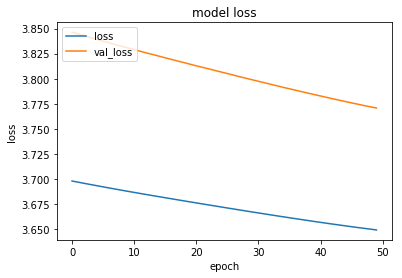

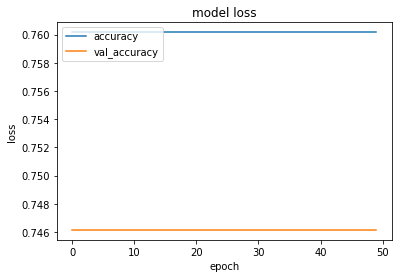

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 79us/step - loss: 3.7451 - acc: 0.7599 - val_loss: 3.8727 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.7448 - acc: 0.7599 - val_loss: 3.8726 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 79us/step - loss: 3.7446 - acc: 0.7599 - val_loss: 3.8725 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.7443 - acc: 0.7599 - val_loss: 3.8724 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7441 - acc: 0.7599 - val_loss: 3.8723 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.7438 - acc: 0.7599 - val_loss: 3.8723 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.7435 - acc: 0.7599 - val_loss: 3

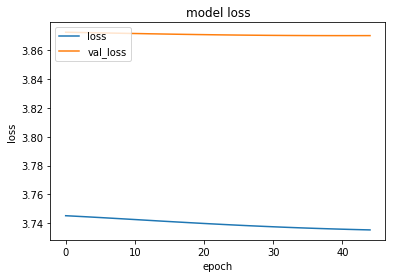

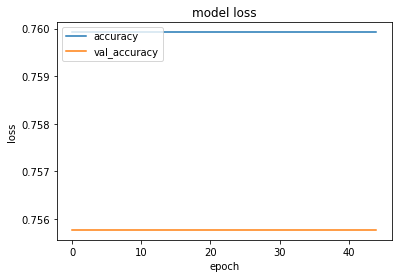

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.6011 - acc: 0.7599 - val_loss: 2.6433 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.6009 - acc: 0.7599 - val_loss: 2.6433 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 77us/step - loss: 2.6008 - acc: 0.7599 - val_loss: 2.6431 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.6008 - acc: 0.7599 - val_loss: 2.6431 - val_acc: 0.7538
Epoch 5/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.6008 - acc: 0.7599 - val_loss: 2.6431 - val_acc: 0.7538
Epoch 6/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.6008 - acc: 0.7599 - val_loss: 2.6431 - val_acc: 0.7538
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.6008 - acc: 0.7599 - val_loss: 2

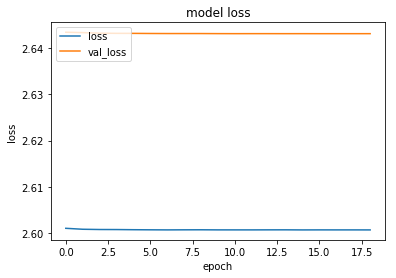

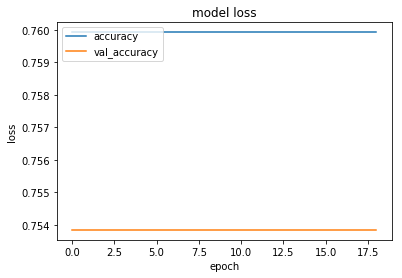

ES STEPS: 1  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 2  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 3  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 4  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 5  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 6  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 7  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 8  - BEST Loss: 2.6646  - BEST SCORE: 0.7609 
ES STEPS: 9  - BEST Loss: 3.7980  - BEST SCORE: 0.7626 
ES STEPS: 10  - BEST Loss: 3.7980  - BEST SCORE: 0.7626 
ES STEPS: 11  - BEST Loss: 3.7980  - BEST SCORE: 0.7626 
ES STEPS: 12  - BEST Loss: 3.7980  - BEST SCORE: 0.7626 
ES STEPS: 13  - BEST Loss: 3.6619  - BEST SCORE: 0.7633 
ES STEPS: 14  - BEST Loss: 3.6619  - BEST SCORE: 0.7633 
ES STEPS: 15  - BEST Loss: 3.7574  - BEST SCORE: 0.7647 
ES STEPS: 16  - BEST Loss: 3.7574  - BEST SCORE: 0.7647 
ES STEPS: 17  - BEST Loss: 3.7574  - BEST SCORE: 0.7647 
ES STEPS: 18  - BEST Loss: 3.7574  - BES

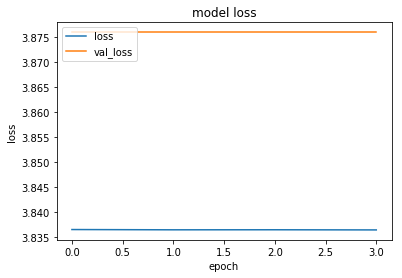

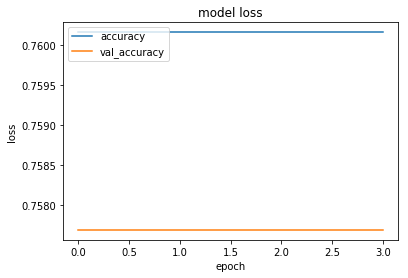

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8182 - acc: 0.7599 - val_loss: 3.9181 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8179 - acc: 0.7599 - val_loss: 3.9177 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.8177 - acc: 0.7599 - val_loss: 3.9176 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8175 - acc: 0.7599 - val_loss: 3.9174 - val_acc: 0.7538
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8172 - acc: 0.7599 - val_loss: 3.9172 - val_acc: 0.7538
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.8169 - acc: 0.7599 - val_loss: 3.9171 - val_acc: 0.7538
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.8166 - acc: 0.7599 - val_loss: 3

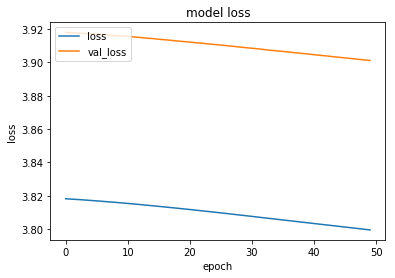

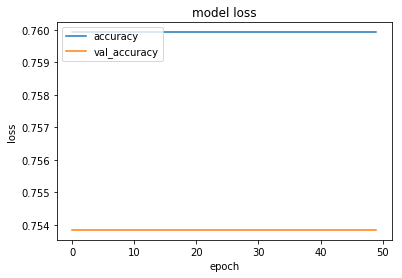

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.6118 - acc: 0.7563 - val_loss: 3.5824 - val_acc: 0.7548
Epoch 2/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.5940 - acc: 0.7580 - val_loss: 3.5796 - val_acc: 0.7548
Epoch 3/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.5937 - acc: 0.7575 - val_loss: 3.5788 - val_acc: 0.7548
Epoch 4/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.5941 - acc: 0.7580 - val_loss: 3.5777 - val_acc: 0.7548
Epoch 5/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.5937 - acc: 0.7580 - val_loss: 3.5784 - val_acc: 0.7548
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.5935 - acc: 0.7575 - val_loss: 3.5810 - val_acc: 0.7548
Epoch 7/50
4157/4157 [==============================] - 0s 80us/step - loss: 3.5929 - acc: 0.7578 - val_loss: 3

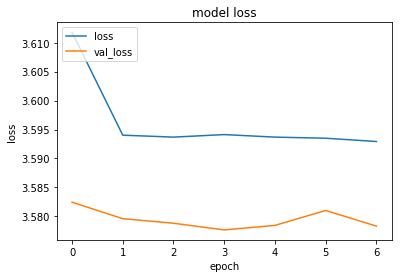

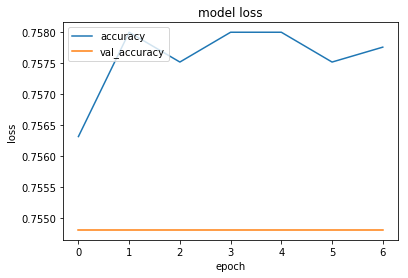

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 79us/step - loss: 3.7397 - acc: 0.7590 - val_loss: 3.8427 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 82us/step - loss: 3.7396 - acc: 0.7590 - val_loss: 3.8427 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.7395 - acc: 0.7590 - val_loss: 3.8426 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7393 - acc: 0.7590 - val_loss: 3.8425 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7392 - acc: 0.7590 - val_loss: 3.8425 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7391 - acc: 0.7590 - val_loss: 3.8424 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7389 - acc: 0.7590 - val_loss: 3

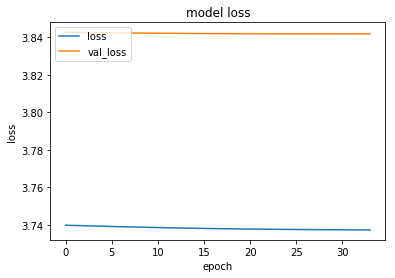

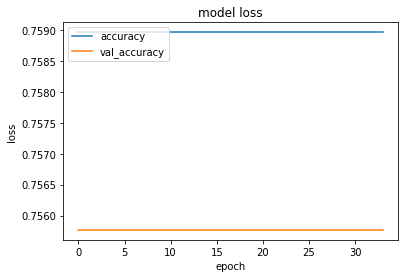

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.9660 - acc: 0.7587 - val_loss: 2.9421 - val_acc: 0.7529
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.9396 - acc: 0.7587 - val_loss: 2.9191 - val_acc: 0.7529
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.9208 - acc: 0.7587 - val_loss: 2.8998 - val_acc: 0.7529
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.9049 - acc: 0.7587 - val_loss: 2.8834 - val_acc: 0.7529
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8907 - acc: 0.7587 - val_loss: 2.8683 - val_acc: 0.7529
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8778 - acc: 0.7587 - val_loss: 2.8545 - val_acc: 0.7529
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8658 - acc: 0.7587 - val_loss: 2

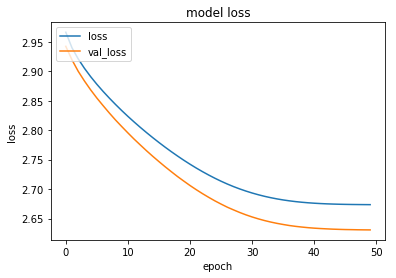

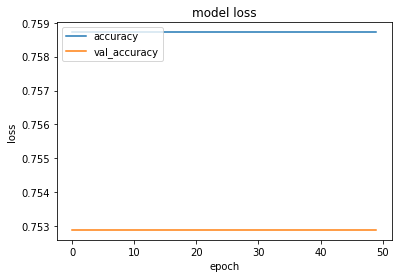

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.3266 - acc: 0.7587 - val_loss: 3.3152 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.3505 - acc: 0.7587 - val_loss: 3.3114 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.3473 - acc: 0.7587 - val_loss: 3.3076 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.3442 - acc: 0.7587 - val_loss: 3.3039 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.3412 - acc: 0.7587 - val_loss: 3.3004 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.3383 - acc: 0.7587 - val_loss: 3.2970 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.3355 - acc: 0.7587 - val_loss: 3

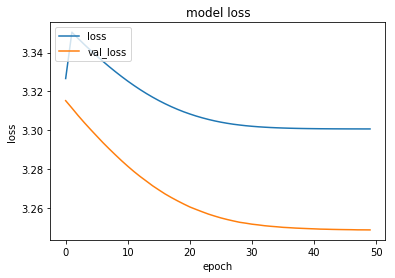

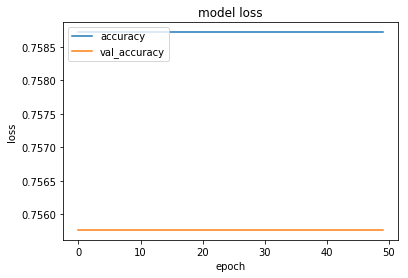

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.3879 - acc: 0.7587 - val_loss: 3.4175 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.3674 - acc: 0.7587 - val_loss: 3.3972 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.3503 - acc: 0.7587 - val_loss: 3.3803 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.3352 - acc: 0.7587 - val_loss: 3.3646 - val_acc: 0.7538
Epoch 5/50
4157/4157 [==============================] - 0s 72us/step - loss: 3.3212 - acc: 0.7587 - val_loss: 3.3500 - val_acc: 0.7538
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.3081 - acc: 0.7587 - val_loss: 3.3367 - val_acc: 0.7538
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.2958 - acc: 0.7587 - val_loss: 3

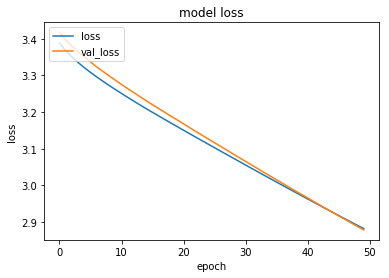

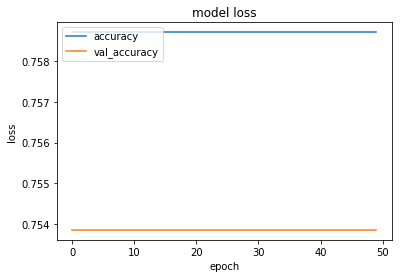

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.4554 - acc: 0.7580 - val_loss: 3.4219 - val_acc: 0.7567
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.4498 - acc: 0.7580 - val_loss: 3.4155 - val_acc: 0.7567
Epoch 3/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.4442 - acc: 0.7580 - val_loss: 3.4091 - val_acc: 0.7567
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.4384 - acc: 0.7580 - val_loss: 3.4026 - val_acc: 0.7567
Epoch 5/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.4325 - acc: 0.7580 - val_loss: 3.3958 - val_acc: 0.7567
Epoch 6/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.4265 - acc: 0.7580 - val_loss: 3.3890 - val_acc: 0.7567
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.4204 - acc: 0.7580 - val_loss: 3

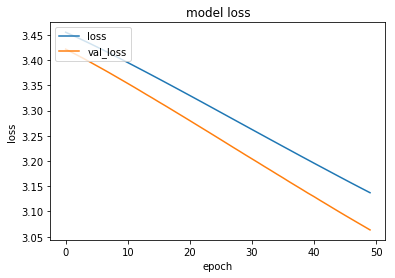

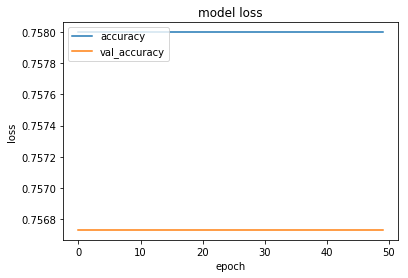

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.8281 - acc: 0.7575 - val_loss: 3.8498 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8280 - acc: 0.7575 - val_loss: 3.8498 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8280 - acc: 0.7575 - val_loss: 3.8497 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8279 - acc: 0.7575 - val_loss: 3.8496 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8278 - acc: 0.7575 - val_loss: 3.8495 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8277 - acc: 0.7575 - val_loss: 3.8494 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8276 - acc: 0.7575 - val_loss: 3

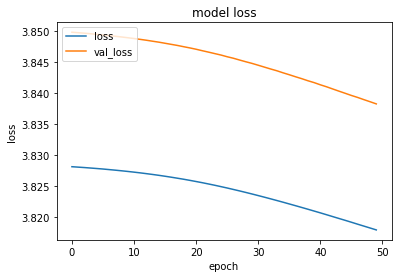

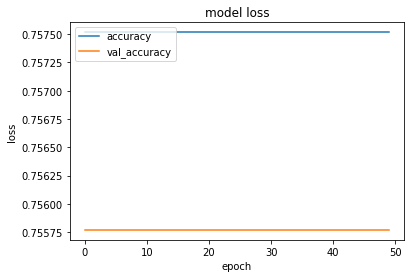

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8843 - acc: 0.7575 - val_loss: 3.9129 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.8843 - acc: 0.7575 - val_loss: 3.9129 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.8843 - acc: 0.7575 - val_loss: 3.9129 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.8843 - acc: 0.7575 - val_loss: 3.9129 - val_acc: 0.7558
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


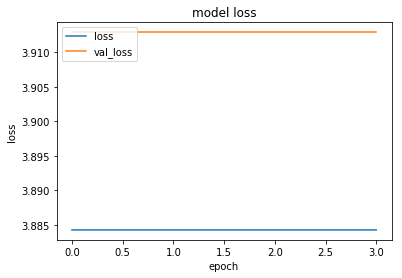

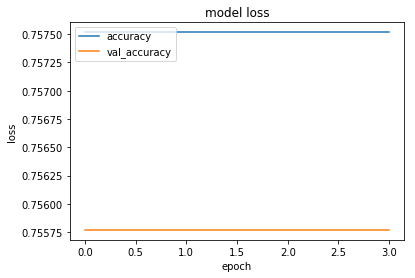

ES STEPS: 1  - BEST Loss: 3.8325  - BEST SCORE: 0.7606 
ES STEPS: 2  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 3  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 4  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 5  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 6  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 7  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 8  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 9  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 10  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 11  - BEST Loss: 3.7628  - BEST SCORE: 0.7650 
ES STEPS: 12  - BEST Loss: 3.7589  - BEST SCORE: 0.7652 
ES STEPS: 13  - BEST Loss: 3.7589  - BEST SCORE: 0.7652 
ES STEPS: 14  - BEST Loss: 3.7589  - BEST SCORE: 0.7652 
ES STEPS: 15  - BEST Loss: 3.7589  - BEST SCORE: 0.7652 
ES STEPS: 16  - BEST Loss: 3.7589  - BEST SCORE: 0.7652 
ES STEPS: 17  - BEST Loss: 3.7589  - BEST SCORE: 0.7652 
ES STEPS: 18  - BEST Loss: 3.7589  - BES

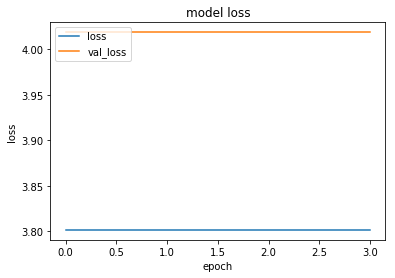

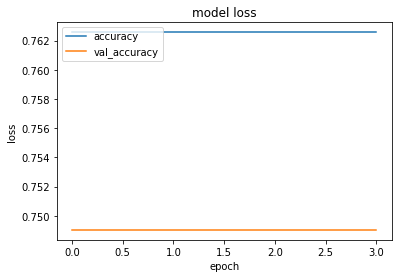

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8057 - acc: 0.7623 - val_loss: 3.9422 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 78us/step - loss: 3.8057 - acc: 0.7623 - val_loss: 3.9422 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 82us/step - loss: 3.8057 - acc: 0.7623 - val_loss: 3.9422 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8057 - acc: 0.7623 - val_loss: 3.9422 - val_acc: 0.7538
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


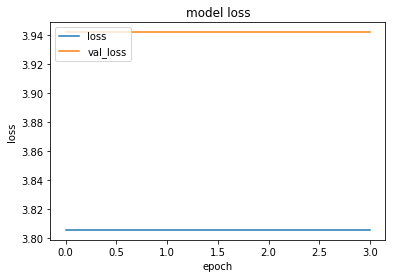

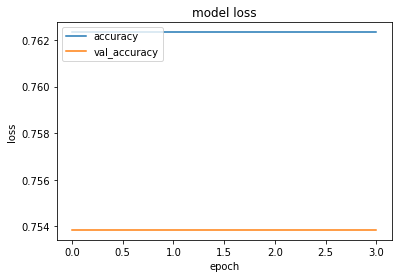

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.8113 - acc: 0.7618 - val_loss: 3.9253 - val_acc: 0.7548
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8113 - acc: 0.7618 - val_loss: 3.9253 - val_acc: 0.7548
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8113 - acc: 0.7618 - val_loss: 3.9253 - val_acc: 0.7548
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8113 - acc: 0.7618 - val_loss: 3.9253 - val_acc: 0.7548
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


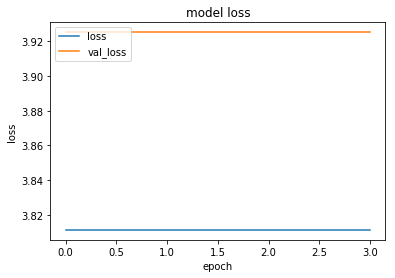

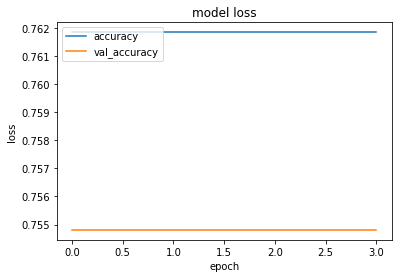

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8170 - acc: 0.7616 - val_loss: 3.8954 - val_acc: 0.7567
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8170 - acc: 0.7616 - val_loss: 3.8954 - val_acc: 0.7567
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8170 - acc: 0.7616 - val_loss: 3.8954 - val_acc: 0.7567
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8170 - acc: 0.7616 - val_loss: 3.8954 - val_acc: 0.7567
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


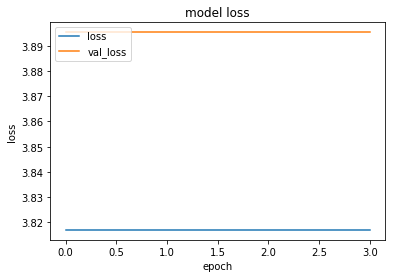

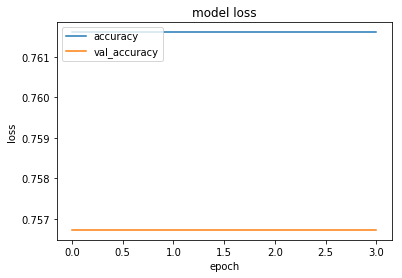

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8232 - acc: 0.7611 - val_loss: 3.9410 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8232 - acc: 0.7611 - val_loss: 3.9410 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8232 - acc: 0.7611 - val_loss: 3.9410 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8232 - acc: 0.7611 - val_loss: 3.9410 - val_acc: 0.7538
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


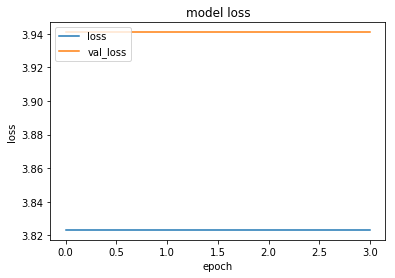

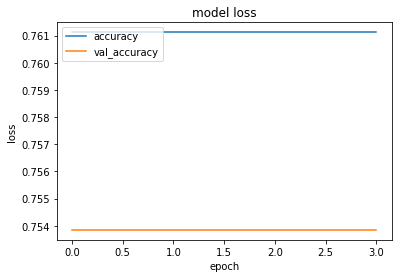

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 79us/step - loss: 3.8310 - acc: 0.7606 - val_loss: 3.8952 - val_acc: 0.7567
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8310 - acc: 0.7606 - val_loss: 3.8952 - val_acc: 0.7567
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8310 - acc: 0.7606 - val_loss: 3.8952 - val_acc: 0.7567
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8310 - acc: 0.7606 - val_loss: 3.8952 - val_acc: 0.7567
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


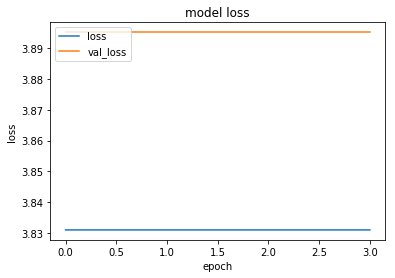

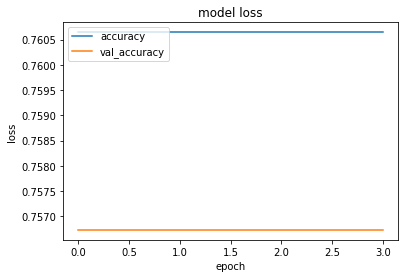

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8335 - acc: 0.7604 - val_loss: 3.9085 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.8335 - acc: 0.7604 - val_loss: 3.9085 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8335 - acc: 0.7604 - val_loss: 3.9085 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8335 - acc: 0.7604 - val_loss: 3.9085 - val_acc: 0.7558
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


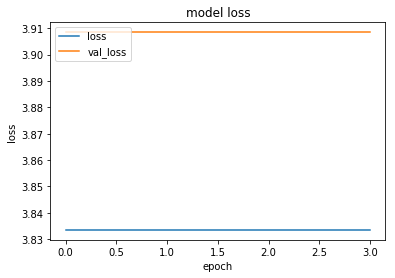

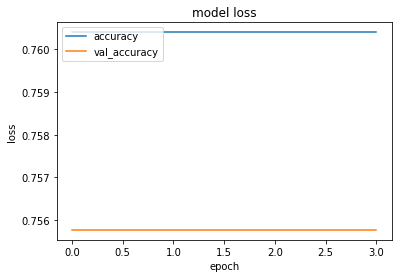

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.8424 - acc: 0.7599 - val_loss: 4.0486 - val_acc: 0.7471
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8424 - acc: 0.7599 - val_loss: 4.0486 - val_acc: 0.7471
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8424 - acc: 0.7599 - val_loss: 4.0486 - val_acc: 0.7471
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8424 - acc: 0.7599 - val_loss: 4.0486 - val_acc: 0.7471
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


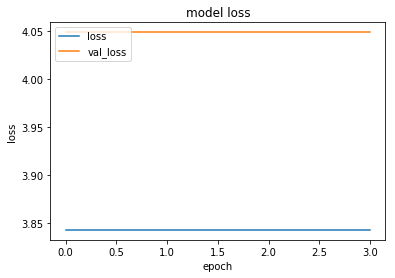

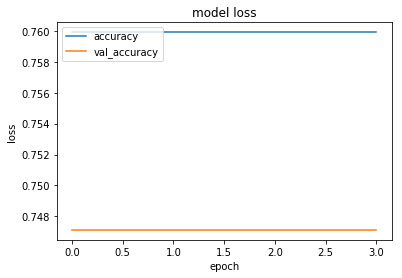

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9565 - val_acc: 0.7529
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9565 - val_acc: 0.7529
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9565 - val_acc: 0.7529
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9565 - val_acc: 0.7529
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


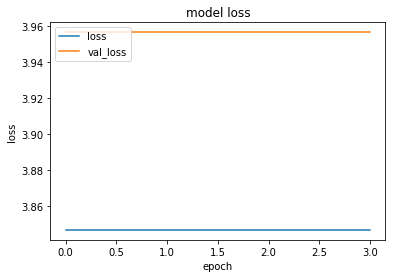

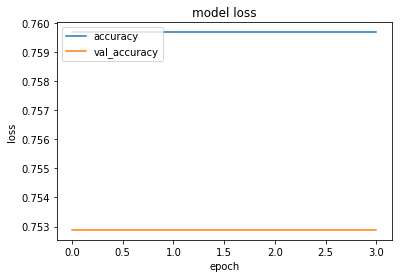

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9415 - val_acc: 0.7538
Epoch 2/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9415 - val_acc: 0.7538
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9415 - val_acc: 0.7538
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.8467 - acc: 0.7597 - val_loss: 3.9415 - val_acc: 0.7538
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


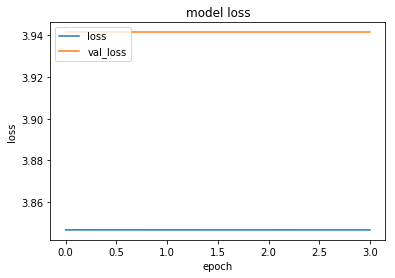

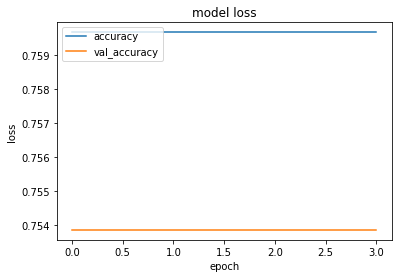

ES STEPS: 1  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 2  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 3  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 4  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 5  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 6  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 7  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 8  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 9  - BEST Loss: 3.7641  - BEST SCORE: 0.7647 
ES STEPS: 10  - BEST Loss: 3.0842  - BEST SCORE: 0.7652 
ES STEPS: 11  - BEST Loss: 3.0842  - BEST SCORE: 0.7652 
ES STEPS: 12  - BEST Loss: 3.7428  - BEST SCORE: 0.7662 
ES STEPS: 13  - BEST Loss: 3.7428  - BEST SCORE: 0.7662 
ES STEPS: 14  - BEST Loss: 2.9933  - BEST SCORE: 0.7664 
ES STEPS: 15  - BEST Loss: 2.9933  - BEST SCORE: 0.7664 
ES STEPS: 16  - BEST Loss: 2.9933  - BEST SCORE: 0.7664 
ES STEPS: 17  - BEST Loss: 2.9933  - BEST SCORE: 0.7664 
ES STEPS: 18  - BEST Loss: 2.9933  - BES

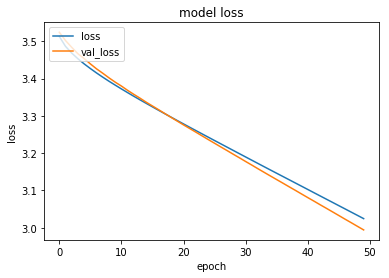

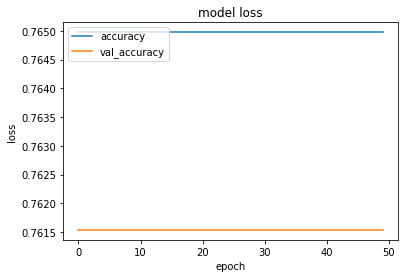

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.2870 - acc: 0.7647 - val_loss: 3.3438 - val_acc: 0.7587
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.2765 - acc: 0.7647 - val_loss: 3.3325 - val_acc: 0.7587
Epoch 3/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.2661 - acc: 0.7647 - val_loss: 3.3215 - val_acc: 0.7587
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.2559 - acc: 0.7647 - val_loss: 3.3106 - val_acc: 0.7587
Epoch 5/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.2457 - acc: 0.7647 - val_loss: 3.2997 - val_acc: 0.7587
Epoch 6/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.2355 - acc: 0.7647 - val_loss: 3.2887 - val_acc: 0.7587
Epoch 7/50
4157/4157 [==============================] - 0s 76us/step - loss: 3.2255 - acc: 0.7647 - val_loss: 3

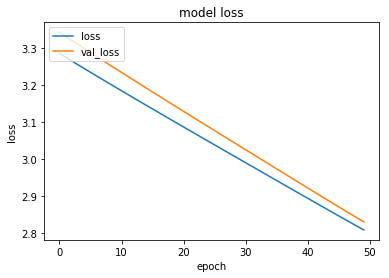

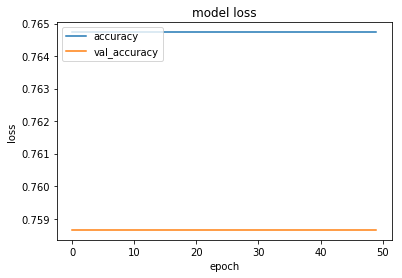

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 99us/step - loss: 3.7732 - acc: 0.7643 - val_loss: 3.8179 - val_acc: 0.7615
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 3.7732 - acc: 0.7643 - val_loss: 3.8179 - val_acc: 0.7615
Epoch 3/50
4157/4157 [==============================] - 0s 95us/step - loss: 3.7732 - acc: 0.7643 - val_loss: 3.8179 - val_acc: 0.7615
Epoch 4/50
4157/4157 [==============================] - 0s 95us/step - loss: 3.7732 - acc: 0.7643 - val_loss: 3.8179 - val_acc: 0.7615
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


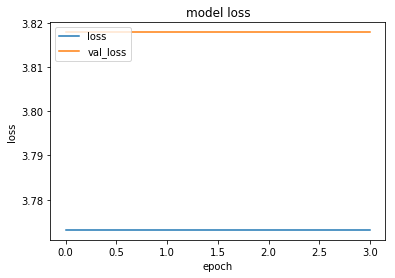

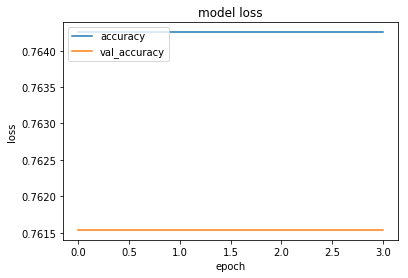

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 101us/step - loss: 3.0397 - acc: 0.7635 - val_loss: 3.0433 - val_acc: 0.7606
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.0239 - acc: 0.7635 - val_loss: 3.0273 - val_acc: 0.7606
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 3.0089 - acc: 0.7635 - val_loss: 3.0119 - val_acc: 0.7606
Epoch 4/50
4157/4157 [==============================] - 0s 97us/step - loss: 2.9946 - acc: 0.7635 - val_loss: 2.9972 - val_acc: 0.7606
Epoch 5/50
4157/4157 [==============================] - 0s 94us/step - loss: 2.9807 - acc: 0.7635 - val_loss: 2.9828 - val_acc: 0.7606
Epoch 6/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.9672 - acc: 0.7635 - val_loss: 2.9688 - val_acc: 0.7606
Epoch 7/50
4157/4157 [==============================] - 0s 79us/step - loss: 2.9540 - acc: 0.7635 - val_loss

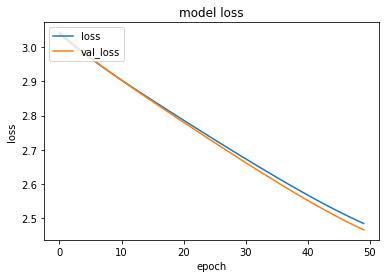

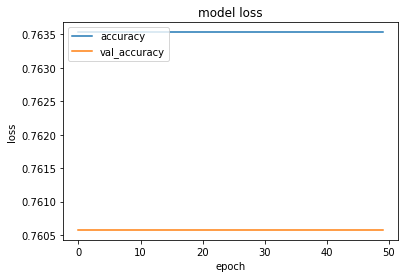

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 80us/step - loss: 3.7843 - acc: 0.7635 - val_loss: 3.7862 - val_acc: 0.7635
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7843 - acc: 0.7635 - val_loss: 3.7862 - val_acc: 0.7635
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.7843 - acc: 0.7635 - val_loss: 3.7862 - val_acc: 0.7635
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.7843 - acc: 0.7635 - val_loss: 3.7862 - val_acc: 0.7635
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


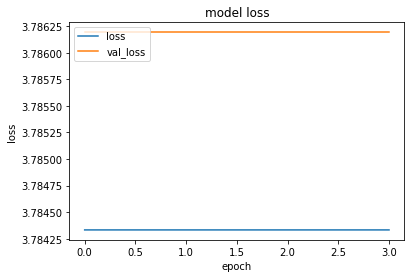

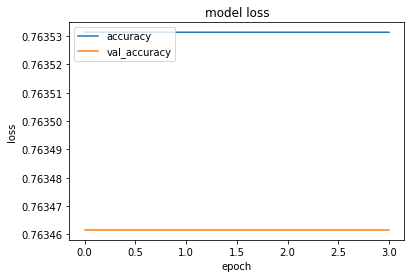

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.0243 - acc: 0.7635 - val_loss: 2.9851 - val_acc: 0.7635
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.0132 - acc: 0.7635 - val_loss: 2.9739 - val_acc: 0.7635
Epoch 3/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.0024 - acc: 0.7635 - val_loss: 2.9626 - val_acc: 0.7635
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.9918 - acc: 0.7635 - val_loss: 2.9515 - val_acc: 0.7635
Epoch 5/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.9814 - acc: 0.7635 - val_loss: 2.9408 - val_acc: 0.7635
Epoch 6/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.9711 - acc: 0.7635 - val_loss: 2.9302 - val_acc: 0.7635
Epoch 7/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.9610 - acc: 0.7635 - val_loss: 2

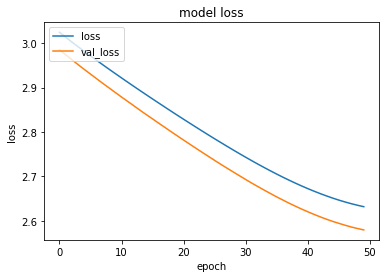

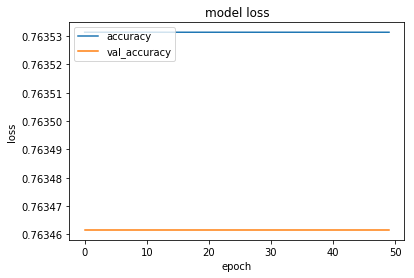

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.1638 - acc: 0.7633 - val_loss: 3.2823 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 77us/step - loss: 3.1514 - acc: 0.7633 - val_loss: 3.2684 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 75us/step - loss: 3.1394 - acc: 0.7633 - val_loss: 3.2555 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.1278 - acc: 0.7633 - val_loss: 3.2425 - val_acc: 0.7510
Epoch 5/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.1164 - acc: 0.7633 - val_loss: 3.2303 - val_acc: 0.7510
Epoch 6/50
4157/4157 [==============================] - 0s 73us/step - loss: 3.1053 - acc: 0.7633 - val_loss: 3.2180 - val_acc: 0.7510
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 3.0944 - acc: 0.7633 - val_loss: 3

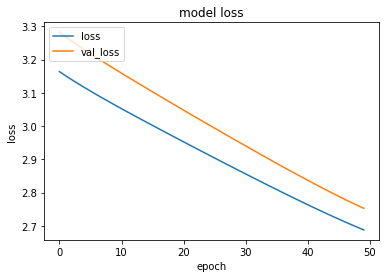

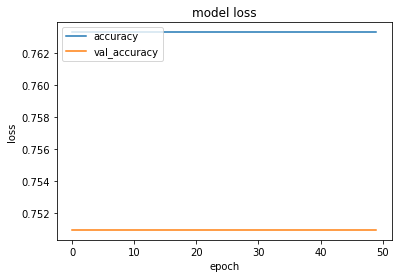

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.7901 - acc: 0.7631 - val_loss: 3.8625 - val_acc: 0.7587
Epoch 2/50
4157/4157 [==============================] - 0s 100us/step - loss: 3.7901 - acc: 0.7631 - val_loss: 3.8624 - val_acc: 0.7587
Epoch 3/50
4157/4157 [==============================] - 0s 95us/step - loss: 3.7901 - acc: 0.7631 - val_loss: 3.8624 - val_acc: 0.7587
Epoch 4/50
4157/4157 [==============================] - 0s 96us/step - loss: 3.7901 - acc: 0.7631 - val_loss: 3.8624 - val_acc: 0.7587
Epoch 5/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.7901 - acc: 0.7631 - val_loss: 3.8624 - val_acc: 0.7587
Epoch 6/50
4157/4157 [==============================] - 0s 93us/step - loss: 3.7900 - acc: 0.7631 - val_loss: 3.8625 - val_acc: 0.7587
Epoch 7/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.7900 - acc: 0.7631 - val_loss: 

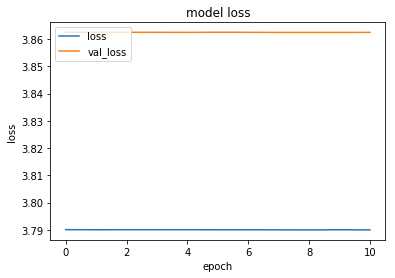

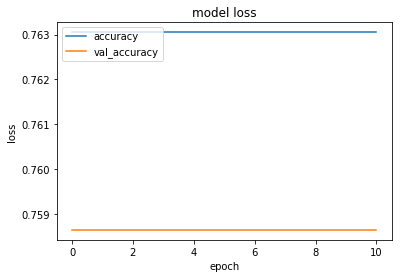

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 93us/step - loss: 3.0979 - acc: 0.7631 - val_loss: 3.1346 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 96us/step - loss: 3.0793 - acc: 0.7631 - val_loss: 3.1153 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 93us/step - loss: 3.0628 - acc: 0.7631 - val_loss: 3.0982 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 95us/step - loss: 3.0477 - acc: 0.7631 - val_loss: 3.0821 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 93us/step - loss: 3.0336 - acc: 0.7631 - val_loss: 3.0673 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.0203 - acc: 0.7631 - val_loss: 3.0526 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.0075 - acc: 0.7631 - val_loss: 3

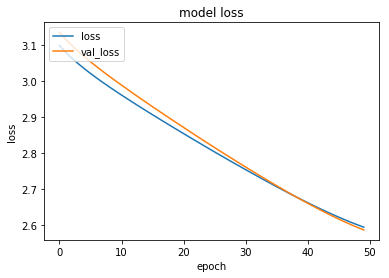

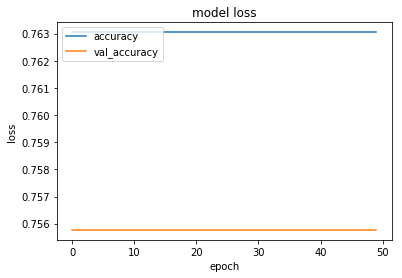

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 95us/step - loss: 3.5056 - acc: 0.7626 - val_loss: 3.6993 - val_acc: 0.7481
Epoch 2/50
4157/4157 [==============================] - 0s 96us/step - loss: 3.4980 - acc: 0.7626 - val_loss: 3.6896 - val_acc: 0.7481
Epoch 3/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.4904 - acc: 0.7626 - val_loss: 3.6816 - val_acc: 0.7481
Epoch 4/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.4826 - acc: 0.7626 - val_loss: 3.6726 - val_acc: 0.7481
Epoch 5/50
4157/4157 [==============================] - 0s 93us/step - loss: 3.4749 - acc: 0.7626 - val_loss: 3.6647 - val_acc: 0.7481
Epoch 6/50
4157/4157 [==============================] - 0s 94us/step - loss: 3.4672 - acc: 0.7626 - val_loss: 3.6560 - val_acc: 0.7481
Epoch 7/50
4157/4157 [==============================] - 0s 93us/step - loss: 3.4594 - acc: 0.7626 - val_loss: 3

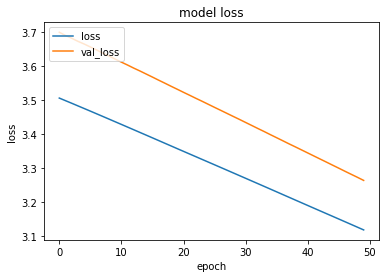

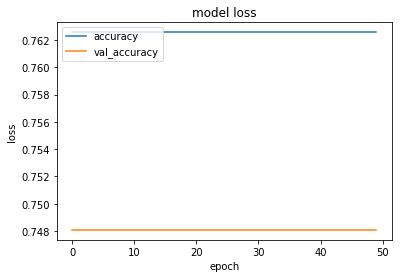

ES STEPS: 1  - BEST Loss: 2.5283  - BEST SCORE: 0.7645 
ES STEPS: 2  - BEST Loss: 2.9265  - BEST SCORE: 0.7650 
ES STEPS: 3  - BEST Loss: 2.5395  - BEST SCORE: 0.7664 
ES STEPS: 4  - BEST Loss: 2.5395  - BEST SCORE: 0.7664 
ES STEPS: 5  - BEST Loss: 2.5395  - BEST SCORE: 0.7664 
ES STEPS: 6  - BEST Loss: 2.5395  - BEST SCORE: 0.7664 
ES STEPS: 7  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 8  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 9  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 10  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 11  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 12  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 13  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 14  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 15  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 16  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 17  - BEST Loss: 3.0270  - BEST SCORE: 0.7667 
ES STEPS: 18  - BEST Loss: 3.0270  - BES

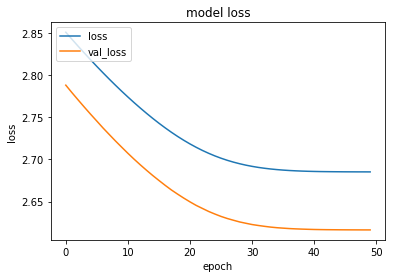

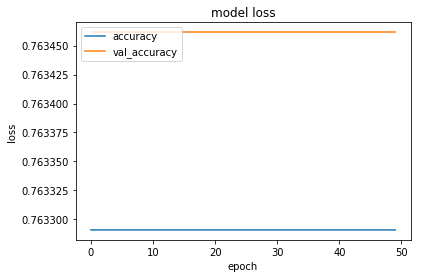

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.8301 - acc: 0.7631 - val_loss: 2.8768 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8120 - acc: 0.7631 - val_loss: 2.8578 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7963 - acc: 0.7631 - val_loss: 2.8412 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.7821 - acc: 0.7631 - val_loss: 2.8258 - val_acc: 0.7519
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7689 - acc: 0.7631 - val_loss: 2.8115 - val_acc: 0.7519
Epoch 6/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.7565 - acc: 0.7631 - val_loss: 2.7978 - val_acc: 0.7519
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7448 - acc: 0.7631 - val_loss: 2

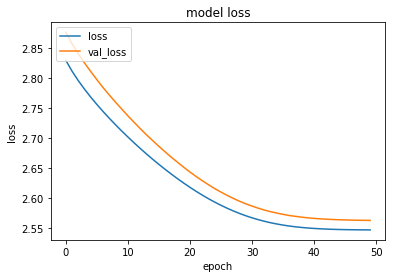

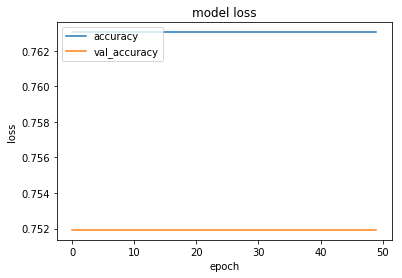

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.7554 - acc: 0.7628 - val_loss: 2.6922 - val_acc: 0.7587
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7415 - acc: 0.7628 - val_loss: 2.6776 - val_acc: 0.7587
Epoch 3/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.7290 - acc: 0.7628 - val_loss: 2.6645 - val_acc: 0.7587
Epoch 4/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.7178 - acc: 0.7628 - val_loss: 2.6524 - val_acc: 0.7587
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7075 - acc: 0.7628 - val_loss: 2.6410 - val_acc: 0.7587
Epoch 6/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.6979 - acc: 0.7628 - val_loss: 2.6309 - val_acc: 0.7587
Epoch 7/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.6890 - acc: 0.7628 - val_loss: 2

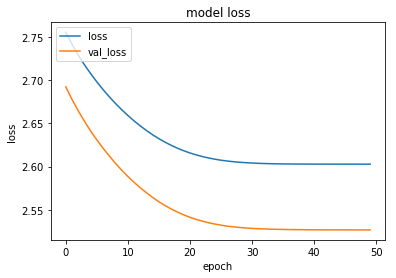

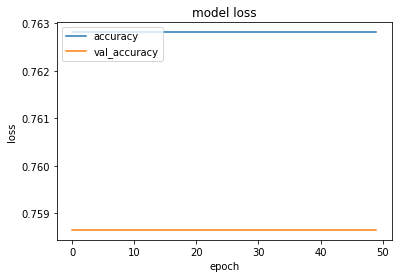

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 99us/step - loss: 2.9120 - acc: 0.7623 - val_loss: 2.9544 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 101us/step - loss: 2.8951 - acc: 0.7623 - val_loss: 2.9368 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 100us/step - loss: 2.8802 - acc: 0.7623 - val_loss: 2.9207 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 101us/step - loss: 2.8666 - acc: 0.7623 - val_loss: 2.9058 - val_acc: 0.7519
Epoch 5/50
4157/4157 [==============================] - 0s 101us/step - loss: 2.8539 - acc: 0.7623 - val_loss: 2.8920 - val_acc: 0.7519
Epoch 6/50
4157/4157 [==============================] - 0s 102us/step - loss: 2.8418 - acc: 0.7623 - val_loss: 2.8787 - val_acc: 0.7519
Epoch 7/50
4157/4157 [==============================] - 0s 102us/step - loss: 2.8304 - acc: 0.7623 - val_l

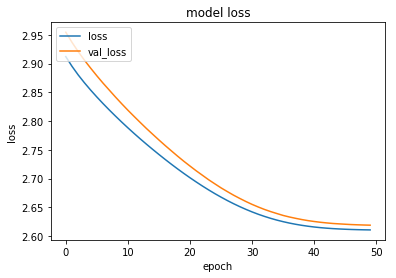

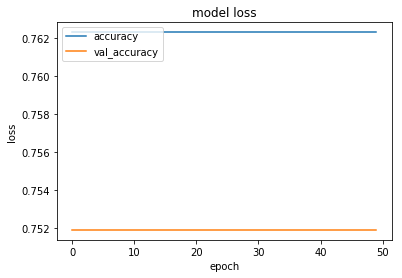

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 109us/step - loss: 2.5955 - acc: 0.7618 - val_loss: 2.6056 - val_acc: 0.7587
Epoch 2/50
4157/4157 [==============================] - 0s 103us/step - loss: 2.5789 - acc: 0.7618 - val_loss: 2.5898 - val_acc: 0.7587
Epoch 3/50
4157/4157 [==============================] - 0s 102us/step - loss: 2.5645 - acc: 0.7618 - val_loss: 2.5761 - val_acc: 0.7587
Epoch 4/50
4157/4157 [==============================] - 0s 101us/step - loss: 2.5517 - acc: 0.7618 - val_loss: 2.5640 - val_acc: 0.7587
Epoch 5/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.5402 - acc: 0.7618 - val_loss: 2.5523 - val_acc: 0.7587
Epoch 6/50
4157/4157 [==============================] - 0s 108us/step - loss: 2.5296 - acc: 0.7618 - val_loss: 2.5423 - val_acc: 0.7587
Epoch 7/50
4157/4157 [==============================] - 0s 107us/step - loss: 2.5201 - acc: 0.7618 - val_

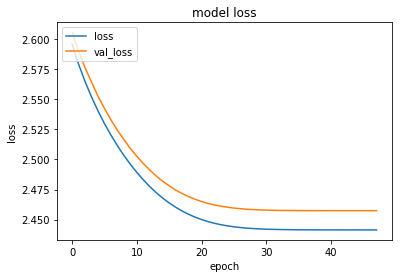

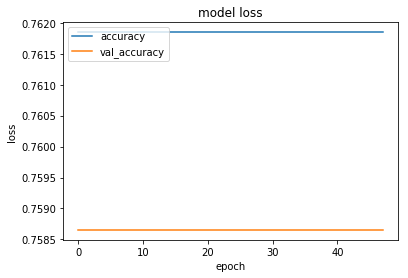

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.6713 - acc: 0.7616 - val_loss: 2.6340 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.6651 - acc: 0.7616 - val_loss: 2.6275 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.6599 - acc: 0.7616 - val_loss: 2.6222 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.6557 - acc: 0.7616 - val_loss: 2.6179 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.6523 - acc: 0.7616 - val_loss: 2.6143 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 72us/step - loss: 2.6495 - acc: 0.7616 - val_loss: 2.6112 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.6472 - acc: 0.7616 - val_loss: 2

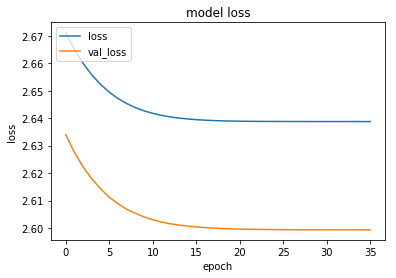

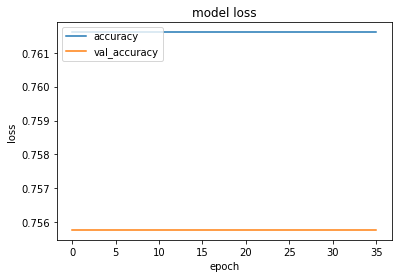

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 78us/step - loss: 2.8946 - acc: 0.7611 - val_loss: 2.9412 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.8748 - acc: 0.7611 - val_loss: 2.9209 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.8575 - acc: 0.7611 - val_loss: 2.9033 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8419 - acc: 0.7611 - val_loss: 2.8867 - val_acc: 0.7519
Epoch 5/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8275 - acc: 0.7611 - val_loss: 2.8715 - val_acc: 0.7519
Epoch 6/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.8140 - acc: 0.7611 - val_loss: 2.8571 - val_acc: 0.7519
Epoch 7/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.8012 - acc: 0.7611 - val_loss: 2

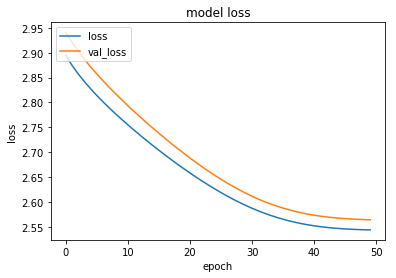

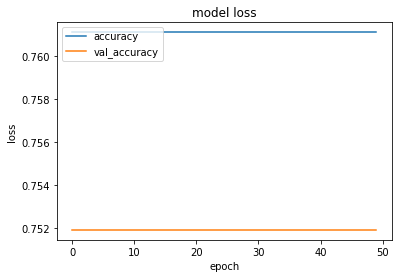

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.4639 - acc: 0.7611 - val_loss: 2.4722 - val_acc: 0.7587
Epoch 2/50
4157/4157 [==============================] - 0s 95us/step - loss: 2.4637 - acc: 0.7611 - val_loss: 2.4719 - val_acc: 0.7587
Epoch 3/50
4157/4157 [==============================] - 0s 94us/step - loss: 2.4635 - acc: 0.7611 - val_loss: 2.4718 - val_acc: 0.7587
Epoch 4/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.4634 - acc: 0.7611 - val_loss: 2.4717 - val_acc: 0.7587
Epoch 5/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.4633 - acc: 0.7611 - val_loss: 2.4715 - val_acc: 0.7587
Epoch 6/50
4157/4157 [==============================] - 0s 93us/step - loss: 2.4633 - acc: 0.7611 - val_loss: 2.4715 - val_acc: 0.7587
Epoch 7/50
4157/4157 [==============================] - 0s 94us/step - loss: 2.4632 - acc: 0.7611 - val_loss: 2

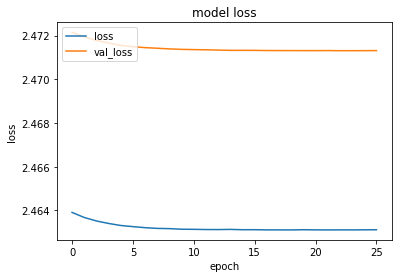

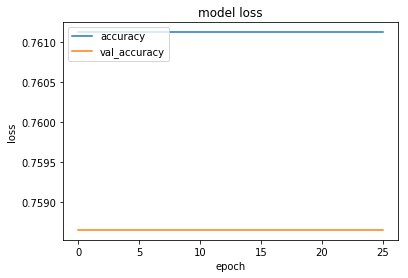

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.8077 - acc: 0.7611 - val_loss: 2.8368 - val_acc: 0.7558
Epoch 2/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7884 - acc: 0.7611 - val_loss: 2.8180 - val_acc: 0.7558
Epoch 3/50
4157/4157 [==============================] - 0s 73us/step - loss: 2.7714 - acc: 0.7611 - val_loss: 2.8014 - val_acc: 0.7558
Epoch 4/50
4157/4157 [==============================] - 0s 77us/step - loss: 2.7561 - acc: 0.7611 - val_loss: 2.7861 - val_acc: 0.7558
Epoch 5/50
4157/4157 [==============================] - 0s 76us/step - loss: 2.7419 - acc: 0.7611 - val_loss: 2.7719 - val_acc: 0.7558
Epoch 6/50
4157/4157 [==============================] - 0s 74us/step - loss: 2.7286 - acc: 0.7611 - val_loss: 2.7581 - val_acc: 0.7558
Epoch 7/50
4157/4157 [==============================] - 0s 75us/step - loss: 2.7160 - acc: 0.7611 - val_loss: 2

In [ ]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, P_Best10_Weights, P_Best10_Sigma  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  for i, i_Weights in enumerate(P_Best10_Weights): 
      print('======================', i, 'of', len(P_Best10_Weights))  
      i_Weights = P_Best10_Weights[i]
      temp_flatten_weight = MyES._UnflattenWeights(WeightsStrucure = MyES.WeightsStrucure, ModifiedWeights = i_Weights)
      model, weights = ModelFit(model=model, weights=temp_flatten_weight, epochs=50)
      _, temp_unflatten_weight = MyES._FlattenWeights(weights) 
      P_Best10_Weights[i] = np.array(temp_unflatten_weight) 
  # ES
  weights, ES_Optimized_ObjVal, P_Best10_Weights, P_Best10_Sigma = MyES.run(weights, max_steps=20, verbose = 1,
                                                                            Population_Parents_Weights=P_Best10_Weights, 
                                                                            Population_Parents_Sigma=P_Best10_Sigma)
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
Performance(model)